In [35]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# II. Physic modelisation of the double pendulum

In [36]:
"""Symbols"""
theta1, theta2, theta1_dot, theta2_dot, theta1_ddot, theta2_ddot = sp.symbols('theta1 theta2 theta1_dot theta2_dot, theta1_ddot, theta2_ddot')

"""Parameters"""
m1, m2, l1, l2 = 1, 1, 1, 1
g = 9.81
y0 = np.array([np.pi/2, np.pi/2, 0, 0])
T = 2.0
N = 1000
h = T/N

"""Equations"""
eq1 = (m1 + m2) * l1 * theta1_ddot + m2 * l2 * theta2_ddot * sp.cos(theta1 - theta2) + m2 * l2 * theta2_dot**2 * sp.sin(theta1 - theta2) + (m1 + m2) * 9.81 * sp.sin(theta1)
eq2 = l1 * theta1_ddot * sp.cos(theta1 - theta2) + l2 * theta2_ddot - l1 * theta1_dot**2 * sp.sin(theta1 - theta2) + 9.81 * sp.sin(theta2)


"""Resolution of the system"""
sys = sp.solve((eq1,eq2),(theta1_ddot,theta2_ddot), dict = True)[0]
theta1_ddot_ = sp.simplify(sys[theta1_ddot])
theta2_ddot_ = sp.simplify(sys[theta2_ddot])

"""Substitution"""
theta1_ddot_lambdify = sp.lambdify((theta1, theta1_dot, theta2, theta2_dot), theta1_ddot_, 'numpy')
theta2_ddot_lambdify = sp.lambdify((theta1, theta1_dot, theta2, theta2_dot), theta2_ddot_, 'numpy')

In [37]:
def function(t, y):
    return np.array([y[2], y[3], theta1_ddot_lambdify(y[0], y[1], y[2], y[3]), theta2_ddot_lambdify(y[0], y[1], y[2], y[3])])

# III. Numerical analysis of ordinary couple differential equations

## 1. Euler explicit method

In [38]:
def Euler(t, Y, h):
    return Y + h * function(t,Y)

In [39]:
def solve(Y0, h, N):
    # Initialize the list of solutions with the initial condition
    Ys = [Y0]

    # Loop over all time steps
    for n in range(N):
        # Calculate the state at the next time step using the Euler method
        Y_next = Euler(n, Ys[-1],h)
        # Append the new state to the list of solutions
        Ys.append(Y_next)

    return Ys

In [40]:
# Given parameters
m1 = m2 = 1  
l1 = l2 = 1  
Y0 = np.array([np.pi/2, np.pi/2, 0, 0])  
N = 10**3  
T = 2 
h = T / N  # 

# Calculate the state at each time step
Ys = solve(Y0, h, N)

# Extract the angles of the two pendulums
theta1 = [Y[0] for Y in Ys]
theta2 = [Y[1] for Y in Ys]

# Calculate the x and y coordinates of the two pendulums from the angles
x1 = l1 * np.sin(theta1)
y1 = -l1 * np.cos(theta1)
x2 = x1 + l2 * np.sin(theta2)
y2 = y1 - l2 * np.cos(theta2)

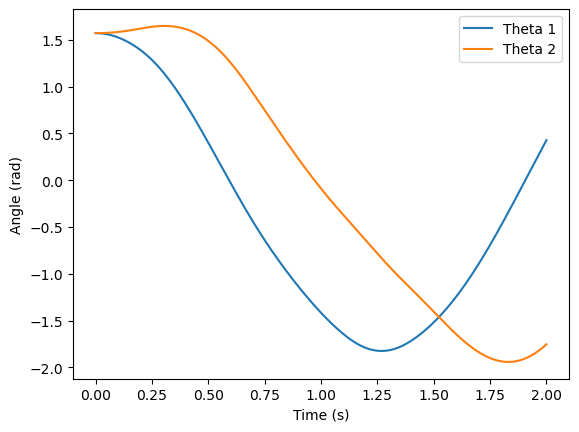

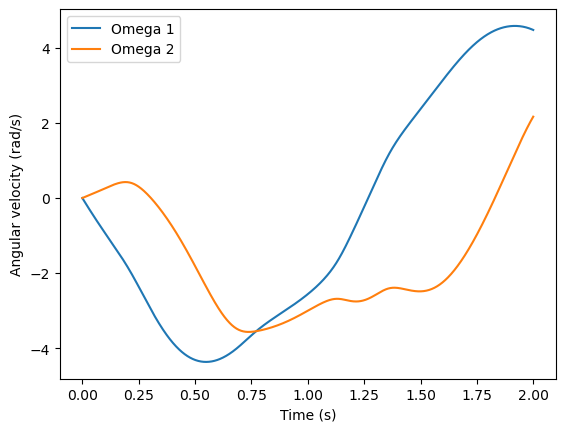

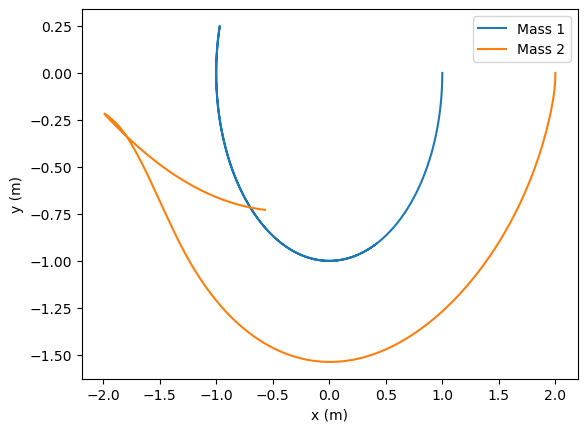

In [41]:
def anglePlot(Ys, h):
    # Extract the angles of the two pendulums
    theta1 = [Y[0] for Y in Ys]
    theta2 = [Y[1] for Y in Ys]

    # Create a time array
    t = np.arange(len(Ys)) * h

    # Plot the angles as a function of time
    plt.figure()
    plt.plot(t, theta1, label='Theta 1')
    plt.plot(t, theta2, label='Theta 2')
    plt.legend()
    plt.xlabel('Time (s)')
    plt.ylabel('Angle (rad)')
    plt.show()

def angularVelocityPlot(Ys, h):
    # Extract the angular velocities of the two pendulums
    omega1 = [Y[2] for Y in Ys]
    omega2 = [Y[3] for Y in Ys]

    # Create a time array
    t = np.arange(len(Ys)) * h

    # Plot the angular velocities as a function of time
    plt.figure()
    plt.plot(t, omega1, label='Omega 1')
    plt.plot(t, omega2, label='Omega 2')
    plt.legend()
    plt.xlabel('Time (s)')
    plt.ylabel('Angular velocity (rad/s)')
    plt.savefig('angularVelocityEvolution.pdf')

def trajectoryPlot(Ys, l1, l2):
    # Extract the angles of the two pendulums
    theta1 = [Y[0] for Y in Ys]
    theta2 = [Y[1] for Y in Ys]

    # Calculate the x and y coordinates of the two pendulums
    x1 = l1 * np.sin(theta1)
    y1 = -l1 * np.cos(theta1)
    x2 = x1 + l2 * np.sin(theta2)
    y2 = y1 - (l2 * np.cos(theta2))

    # Plot the trajectory of the two pendulums
    plt.figure()
    plt.plot(x1, y1, label='Mass 1')
    plt.plot(x2, y2, label='Mass 2')
    plt.legend()
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.show()


anglePlot(Ys, h)
angularVelocityPlot(Ys, h)
trajectoryPlot(Ys, l1, l2)

### Energies

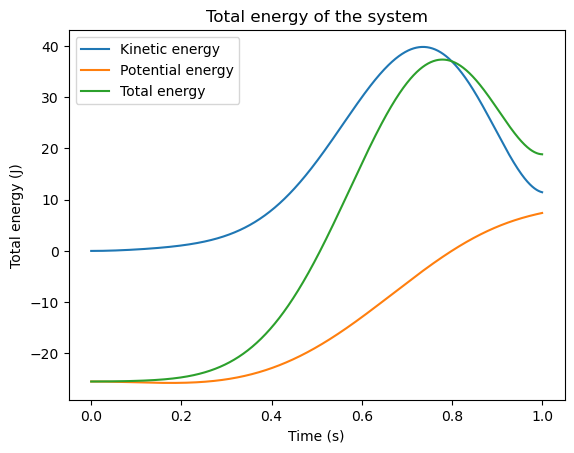

In [42]:
def Ec(Ys, m1, m2, l1, l2):
    g = 9.81
    theta1, theta2, theta1_dot, theta2_dot = Ys

    Ec1 = 0.5 * m1 * (l1**2) * (theta1_dot**2)
    Ec2 = 0.5 * m2 * ((l1**2) * (theta1_dot**2) + (l2**2) * (theta2_dot**2) + 2*l1*l2*theta1_dot*theta2_dot*np.cos(theta1-theta2))
    Ec = Ec1 + Ec2
    return Ec

def Ep(Ys, m1, m2, l1, l2):
    g = 9.81
    theta1, theta2, theta1_dot, theta2_dot = Ys

    Ep1 = -m1*g*l1*np.cos(theta1)
    Ep2 = -m2*g*(l1*np.cos(theta1) + l2*np.cos(theta2))
    Ep = Ep1 + Ep2
    return Ep


def Energy_compute(Ys, m1, m2, l1, l2):

    return Ec(Ys, m1, m2, l1, l2) + Ep(Ys, m1, m2, l1, l2)

def energyPlot(Ys, m1, m2, l1, l2):
    # Calculate the total energy at each time step
    Ec_list = [Ec(Y, m1, m2, l1, l2) for Y in Ys]
    Ep_list = [Ep(Y, m1, m2, l1, l2) for Y in Ys]
    ET_list = [Energy_compute(Y, m1, m2, l1, l2) for Y in Ys]   


    # Create a time array
    t = np.arange(len(Ys)) * h

    # Plot the total energy as a function of time
    plt.figure()
    plt.plot(t, Ec_list, label='Kinetic energy')
    plt.plot(t, Ep_list, label='Potential energy')
    plt.plot(t, ET_list, label='Total energy')
    plt.xlabel('Time (s)')
    plt.ylabel('Total energy (J)')
    plt.title('Total energy of the system')
    plt.legend()
    plt.show()

# Given parameters
m1 = m2 = 1  # kg
l1 = l2 = 1  # m
Y0 = np.array([np.pi/6, np.pi/6, 0, 0])  # initial state
N = 10**3  # number of time steps
T = 1  # s
h = T / N  # time step size

# Calculate the state at each time step using the Euler method
Ys = solve(Y0, h, N)

# Calculate and plot the total energy
energyPlot(Ys, m1, m2, l1, l2)

### Runge-Kutta method

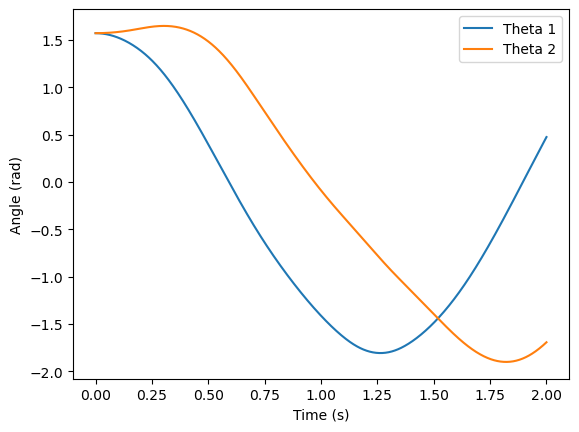

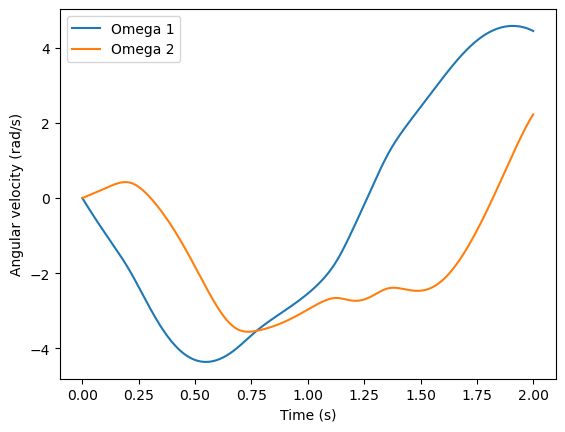

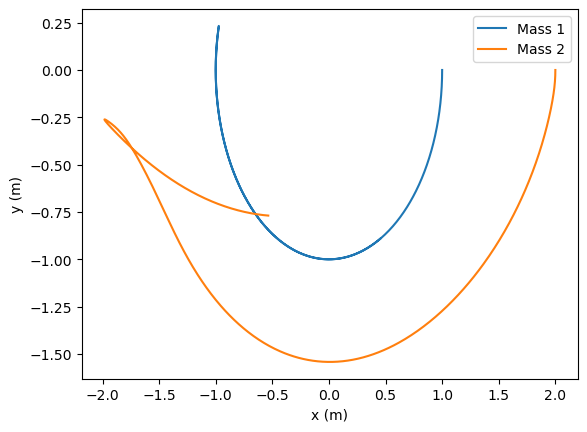

In [43]:
def RK4(Y, h, l1, l2, m1, m2):
    # Calculate the four slopes
    k1 = h * function(0, Y)
    k2 = h * function(0, Y + 0.5 * k1)
    k3 = h * function(0, Y + 0.5 * k2)
    k4 = h * function(0, Y + k3)

    # Calculate the state at the next time step
    Y_next = Y + (k1 + 2 * k2 + 2 * k3 + k4) / 6

    return Y_next

def solve_RK4(Y0, h, l1, l2, m1, m2, N):
    # Initialize the list of solutions with the initial condition
    Ys = [Y0]

    # Loop over all time steps
    for n in range(N):
        # Calculate the state at the next time step using the RK4 method
        Y_next = RK4(Ys[-1], h, l1, l2, m1, m2)
        # Append the new state to the list of solutions
        Ys.append(Y_next)

    return Ys

# Given parameters
# Given parameters
m1 = m2 = 1  
l1 = l2 = 1  
Y0 = np.array([np.pi/2, np.pi/2, 0, 0])
N = 10**3  
T = 2 
h = T / N  # 

# Calculate the state at each time step using the RK4 method
Ys_RK4 = solve_RK4(Y0, h, l1, l2, m1, m2, N)

anglePlot(Ys_RK4, h)
angularVelocityPlot(Ys_RK4, h)
trajectoryPlot(Ys_RK4, l1, l2)

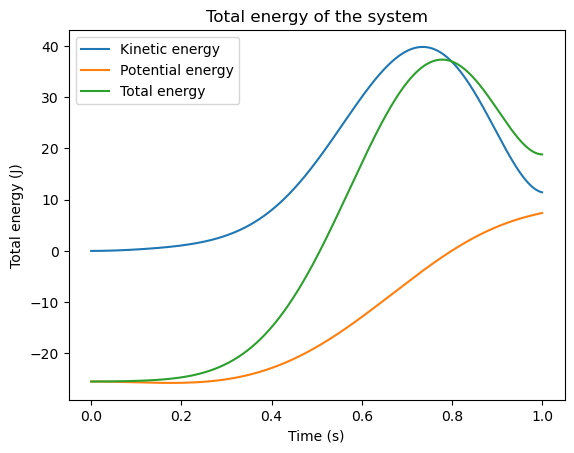

In [44]:
# Given parameters
m1 = m2 = 1  # kg
l1 = l2 = 1  # m
Y0 = np.array([np.pi/6, np.pi/6, 0, 0])  # initial state
N = 10**3  # number of time steps
T = 1  # s
h = T / N  # time step size

# Calculate the state at each time step using the Euler method
Ys = solve_RK4(Y0, h, l1, l2, m1, m2, N)

# Calculate and plot the total energy
energyPlot(Ys, m1, m2, l1, l2)

## 2. Verlet method

In [45]:
def verlet(Y0, h, l1, l2, m1, m2, N = 1000, g = 9.81):
    """
    Y0: initial conditions
    h: temporal path
    l1: length of the first pendulum
    l2: length of the second pendulum
    m1: mass of the first pendulum
    m2: mass of the second pendulum
    N: number of time steps
    g: gravitational acceleration
    """
    # Initialize an array to store the state vectors at each time step
    Y = np.zeros((N+1, 4))
    # Set the initial condition
    Y[0, :] = Y0
    # Compute the derivative vector at the initial state using function F
    # Initial derivative
    F_Y = function(0, Y0)
    # First step using Euler to bootstrap Verlet
    Y[1, :] = Y[0, :] + h * F_Y + 0.5 * h**2 * F_Y

    # Iterate over each time step
    for i in range(1, N):
        # Compute the derivative vector at the current state using function F
        y_temp = np.zeros(4)
        y_temp[:2] = 2 * Y[i, :2] - Y[i-1, :2] + (h**2) * function(0,Y[i, :])[2:] # Verlet method
        y_temp[2:] = (y_temp[:2] - Y[i-1, :2]) / (2 * h) 
        # Updating Y[i+1] using intermediate values
        Y[i+1, :2] = y_temp[:2] 
        Y[i+1, 2:] = (Y[i+1, :2] - Y[i, :2]) / h # Derivative

    return Y

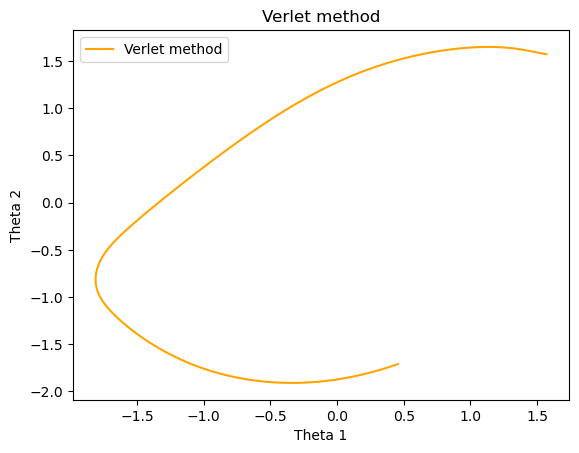

In [46]:
"""Parameters"""
m1, m2, l1, l2 = 1, 1, 1, 1 # Masses and lengths
g = 9.81    # Gravitational acceleration
y0 = np.array([np.pi/2, np.pi/2, 0, 0]) # Initial conditions

"""Temporal path"""
T = 2.0     # Total time
N = 1000    # Number of time steps
h = T / N   # Temporal path

Y = verlet(y0, h, l1, l2, m1, m2, N, g)
plt.plot(Y[:, 0], Y[:, 1], label = 'Verlet method', color = 'orange')
plt.xlabel('Theta 1')
plt.ylabel('Theta 2')
plt.title('Verlet method')
plt.legend()
plt.show()

### Comparaison of the three methods

In [47]:
def trajectoryPlot_all_method(Ys_explicit, Ys_RK4, Ys_verlet, l1, l2):
    method = ['Euler explicit', 'RK4', 'Verlet']
    Ys_list = [Ys_explicit, Ys_RK4, Ys_verlet]
    plt.figure()
    
    for i in range(3):
        Ys = Ys_list[i]
        # Extract the angles of the two pendulums
        theta1 = [Y[0] for Y in Ys]
        theta2 = [Y[1] for Y in Ys]

        # Calculate the x and y coordinates of the two pendulums
        x1 = l1 * np.sin(theta1)
        y1 = -l1 * np.cos(theta1)
        x2 = x1 + l2 * np.sin(theta2)
        y2 = y1 - (l2 * np.cos(theta2))
        # Plot the trajectory of the two pendulums
        plt.plot(x1, y1, label='Mass 1 method: {}'.format(method[i]))
        plt.plot(x2, y2, label='Mass 2 method: {}'.format(method[i]))
        
    plt.legend()
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.show()

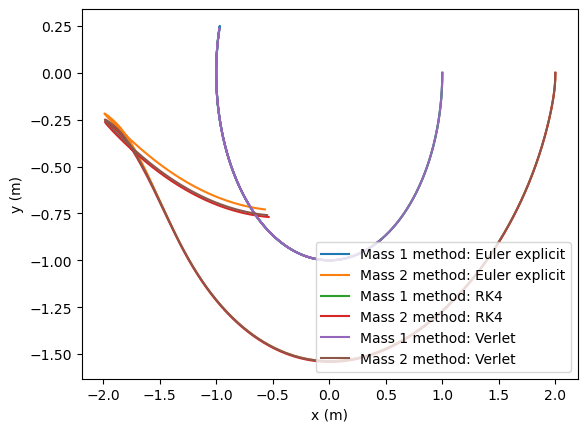

In [48]:
# Given parameters
m1 = m2 = 1  
l1 = l2 = 1  
Y0 = np.array([np.pi/2, np.pi/2, 0, 0])  
N = 10**3  
T = 2 
h = T / N  # 

# Calculate the state at each time step
Ys = solve(Y0, h, N)
Y = verlet(Y0, h, l1, l2, m1, m2, N, g)
trajectoryPlot_all_method(Ys, Ys_RK4, Y, l1, l2)

# IV. Sensitivity to initial conditions

In [49]:
def PhaseSpacePlot(Y):
    plt.figure(figsize=(12, 6))
    
    # Sous-graphique pour le pendule 1
    plt.subplot(1, 2, 1)
    plt.plot(Y[:, 0], Y[:, 2])
    plt.xlabel(r"$\theta_1$")
    plt.ylabel(r"$\theta_1 '$")
    plt.title(r"Phase space plot for $\theta_1$")
    
    # Sous-graphique pour le pendule 2
    plt.subplot(1, 2, 2)
    plt.plot(Y[:, 1], Y[:, 3])
    plt.xlabel(r"$\theta_2$")
    plt.ylabel(r"$\theta_2 '$")
    plt.title(r"Phase space plot for $\theta_2$")
    
    plt.tight_layout()
    plt.show()

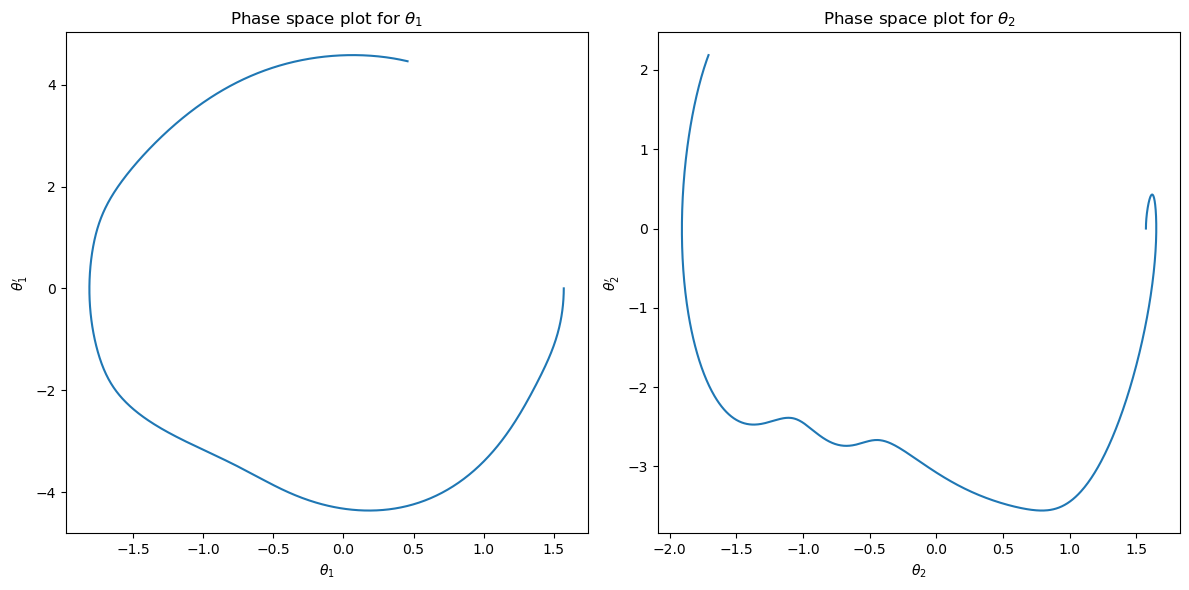

In [50]:
Y = verlet(y0, h, l1, l2, m1, m2, N, g)
PhaseSpacePlot(Y)

Test for initial condition given by $y_0 = [\pi/2, \pi/2, 0, 0]$

### Question 2

In [51]:
def graph_function_time(Y, t):
    """Plot for theta_1 and theta_1'"""
    plt.figure(figsize=(12, 6))
    # Sous-graphique pour theta_1
    plt.subplot(1, 2, 1)
    plt.plot(t, Y[:, 0])
    plt.xlabel("time")
    plt.ylabel(r"$\theta_1$")
    plt.title(r"$\theta_1$ in function of time")
    
    # Sous-graphique pour theta_1'
    plt.subplot(1, 2, 2)
    plt.plot(t, Y[:, 2])
    plt.xlabel("time")
    plt.ylabel(r"$\theta_1 '$")
    plt.title(r"$\theta_1 '$ in function of time")
    
    plt.tight_layout()
    plt.show()
    
    """Plot for theta_2 and theta_2'"""
    plt.figure(figsize=(12, 6))
    # Sous-graphique pour theta_1
    plt.subplot(1, 2, 1)
    plt.plot(t, Y[:, 1])
    plt.xlabel("time")
    plt.ylabel(r"$\theta_2$")
    plt.title(r"$\theta_2$ in function of time")
    
    # Sous-graphique pour theta_1'
    plt.subplot(1, 2, 2)
    plt.plot(t, Y[:, 3])
    plt.xlabel("time")
    plt.ylabel(r"$\theta_2 '$")
    plt.title(r"$\theta_2 '$ in function of time")
    
    plt.tight_layout()
    plt.show()

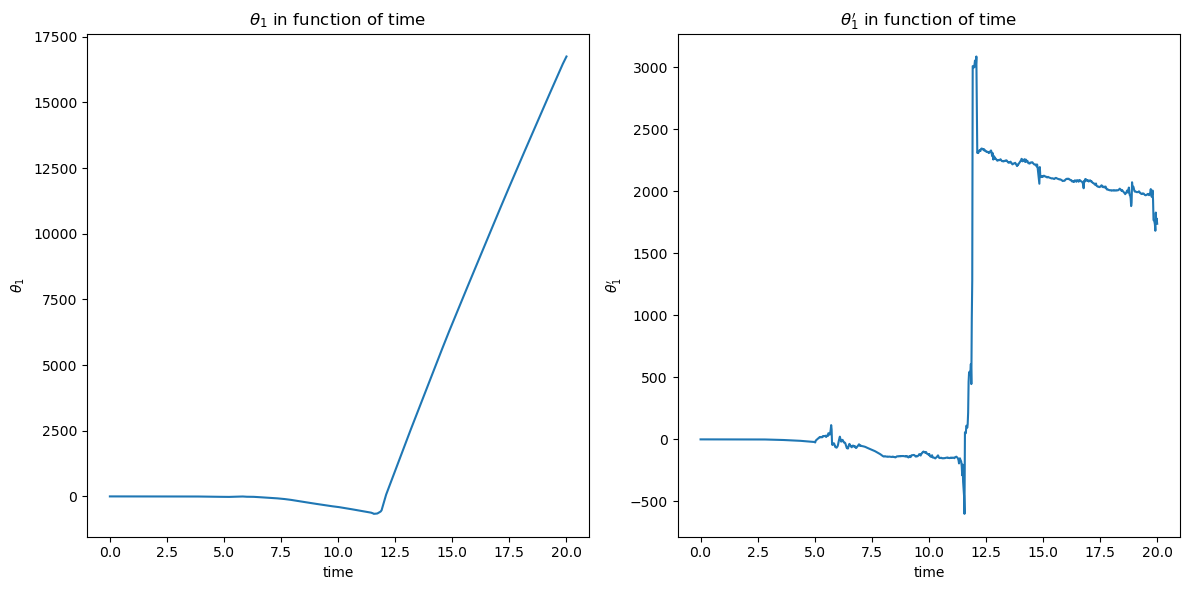

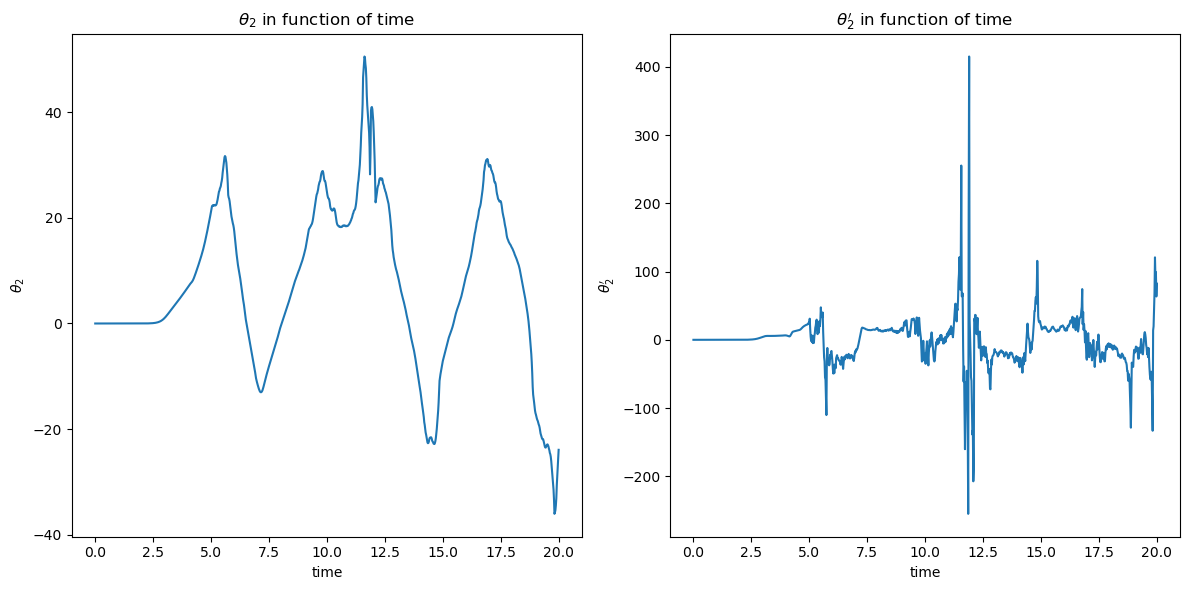

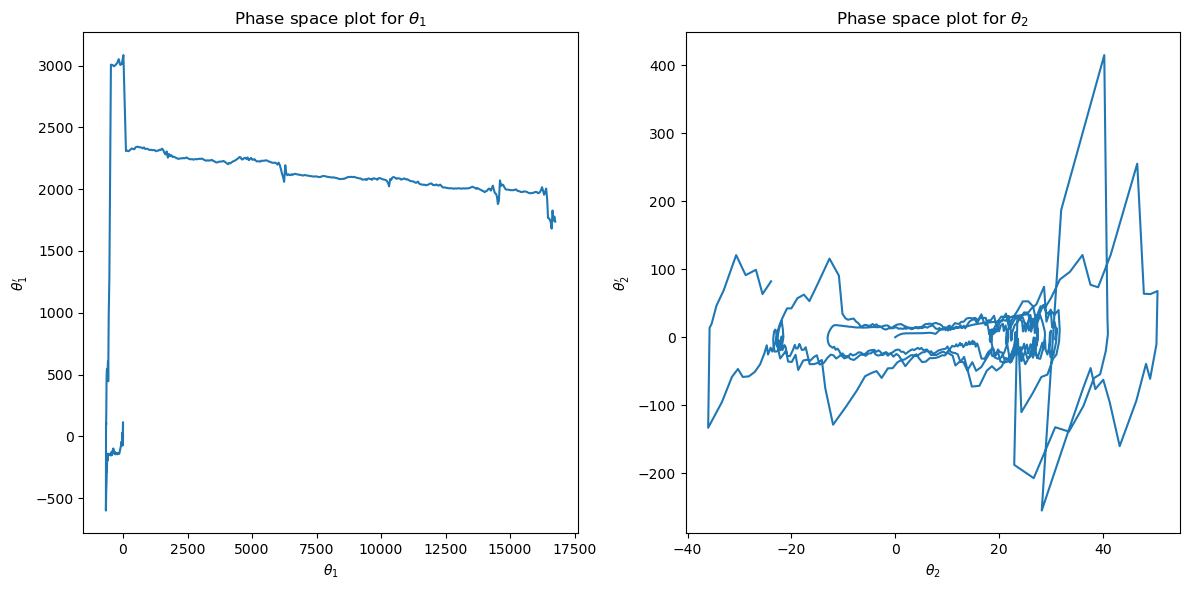

In [52]:
T = 20.0
N = 1000
h = T/N

y0 = np.array([1e-8, np.sqrt(2)* 1e-8, 0, 0])
t = np.linspace(0, T, N+1)

Y = verlet(y0, h, l1, l2, m1, m2, N, g)
graph_function_time(Y, t)
PhaseSpacePlot(Y)

We change the initial condition

<lambdifygenerated-7>:2: RuntimeWarning: overflow encountered in scalar power
  return (50.0*theta1_dot**2*sin(2*theta1 - 2*theta2) + 100.0*theta2_dot**2*sin(theta1 - theta2) + 1471.5*sin(theta1) + 490.5*sin(theta1 - 2*theta2))/(100.0*cos(theta1 - theta2)**2 - 200.0)
<lambdifygenerated-8>:2: RuntimeWarning: overflow encountered in scalar power
  return (-100.0*theta1_dot**2*sin(theta1 - theta2) - 25.0*theta2_dot**2*sin(2*theta1 - 2*theta2) + 490.5*sin(theta2) - 490.5*sin(2*theta1 - theta2))/(50.0*cos(theta1 - theta2)**2 - 100.0)
<lambdifygenerated-7>:2: RuntimeWarning: invalid value encountered in scalar subtract
  return (50.0*theta1_dot**2*sin(2*theta1 - 2*theta2) + 100.0*theta2_dot**2*sin(theta1 - theta2) + 1471.5*sin(theta1) + 490.5*sin(theta1 - 2*theta2))/(100.0*cos(theta1 - theta2)**2 - 200.0)
<lambdifygenerated-7>:2: RuntimeWarning: invalid value encountered in sin
  return (50.0*theta1_dot**2*sin(2*theta1 - 2*theta2) + 100.0*theta2_dot**2*sin(theta1 - theta2) + 1471.5*sin(theta

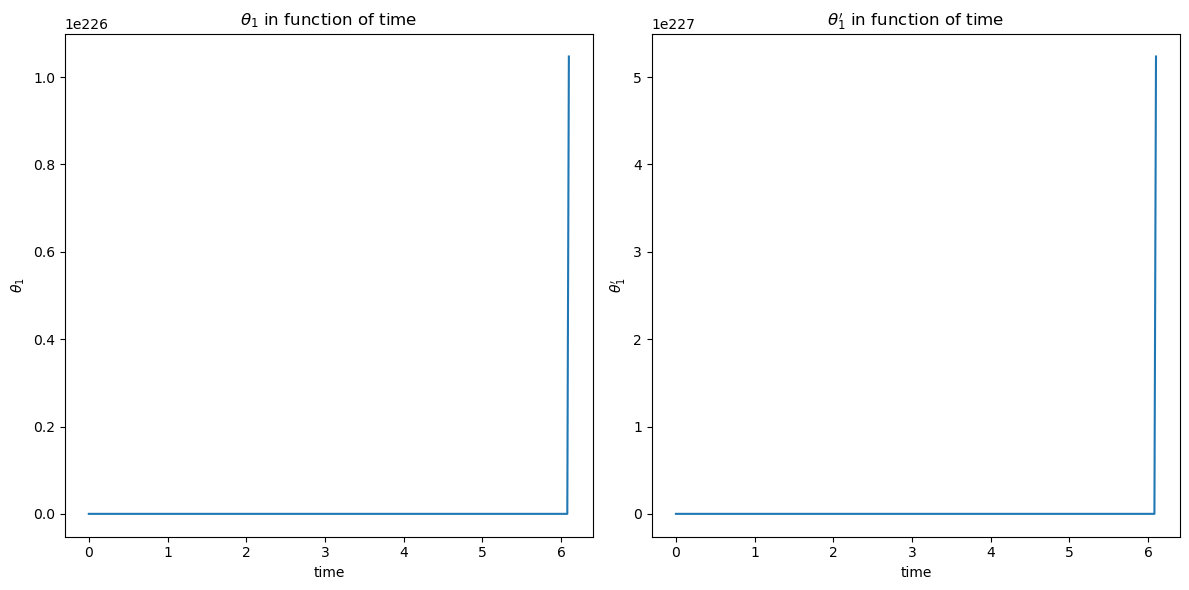

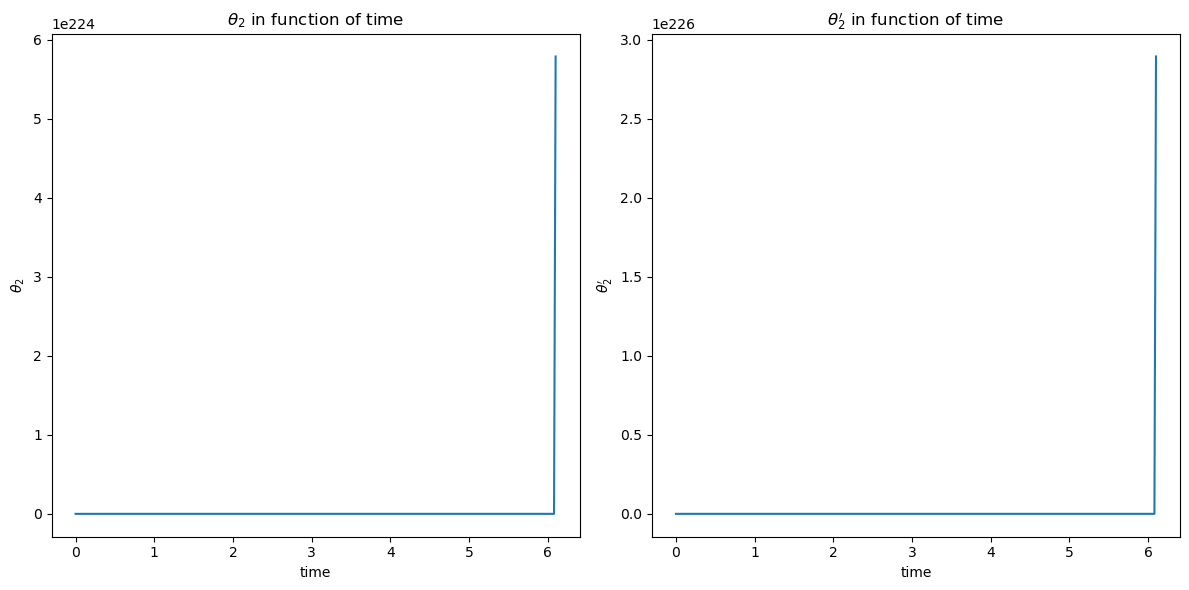

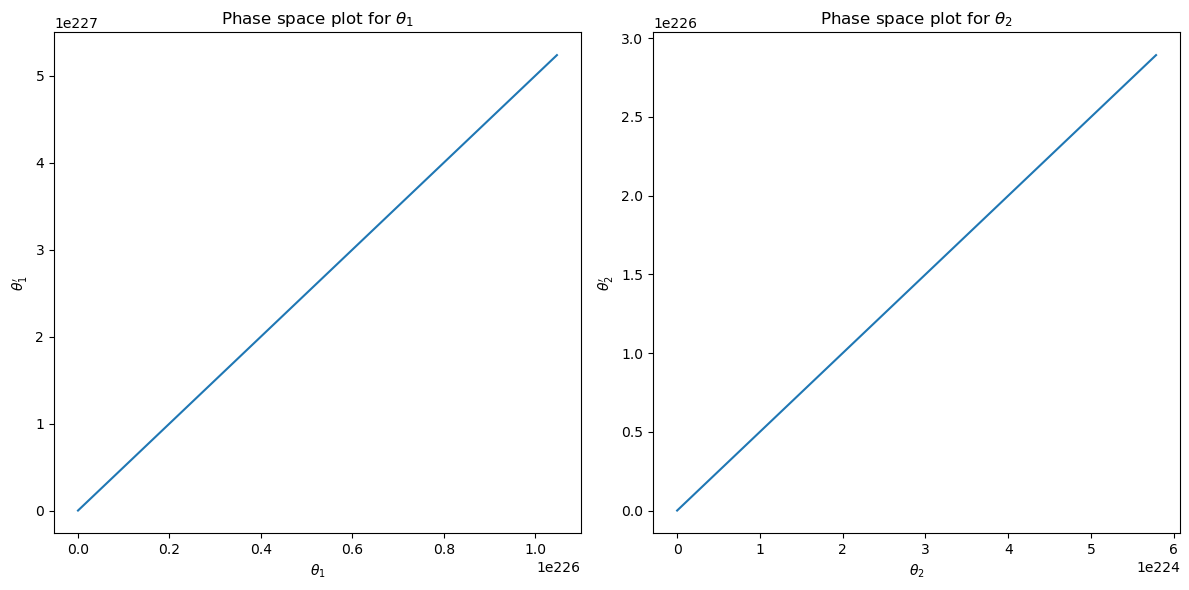

In [53]:
y0 = np.array([1e-8, 1e-8, 0, 0])
Y = verlet(y0, h, l1, l2, m1, m2, N, g)
graph_function_time(Y, t)
PhaseSpacePlot(Y)

As we change the initial condition, the system is very sensitive to the initial condition. The system is chaotic.

### Question 3

Initial condition:  1e-09


<lambdifygenerated-7>:2: RuntimeWarning: invalid value encountered in scalar add
  return (50.0*theta1_dot**2*sin(2*theta1 - 2*theta2) + 100.0*theta2_dot**2*sin(theta1 - theta2) + 1471.5*sin(theta1) + 490.5*sin(theta1 - 2*theta2))/(100.0*cos(theta1 - theta2)**2 - 200.0)


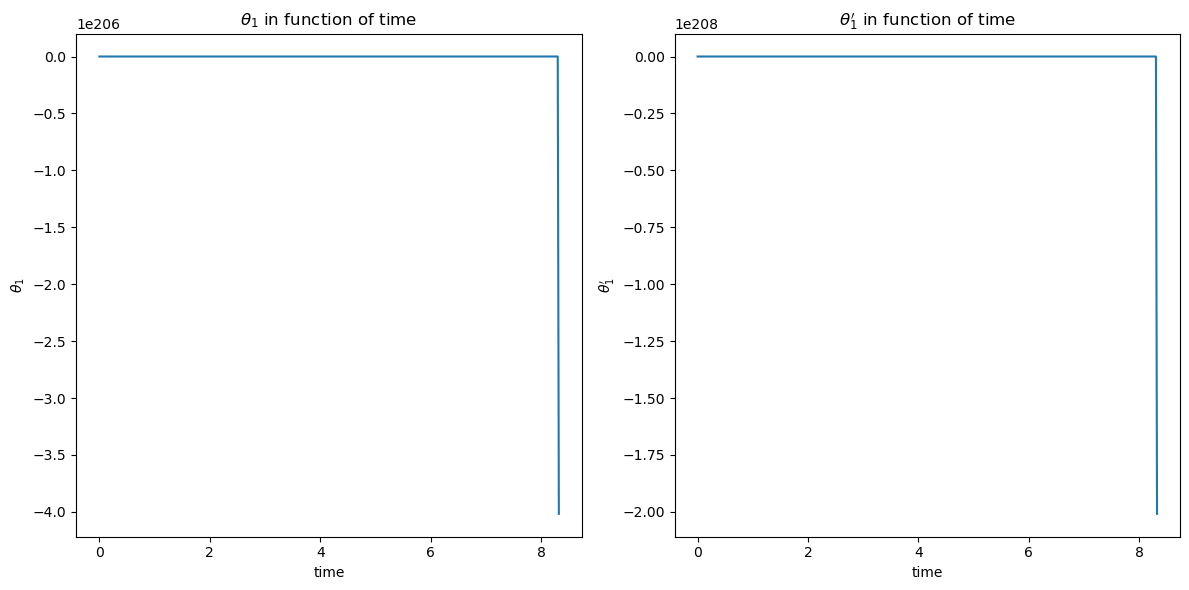

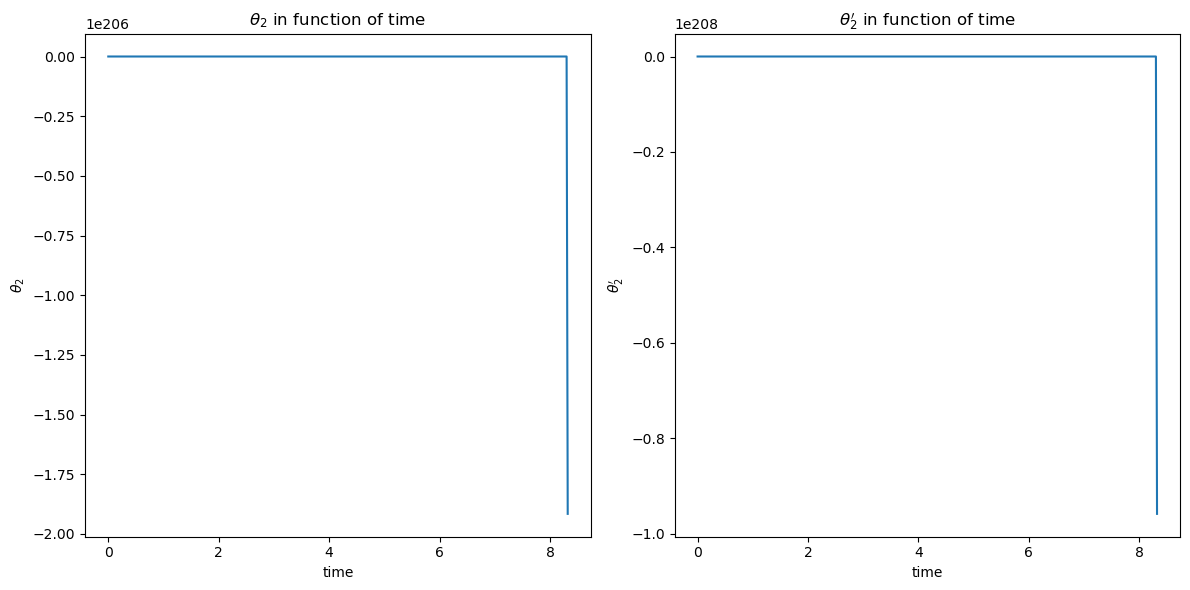

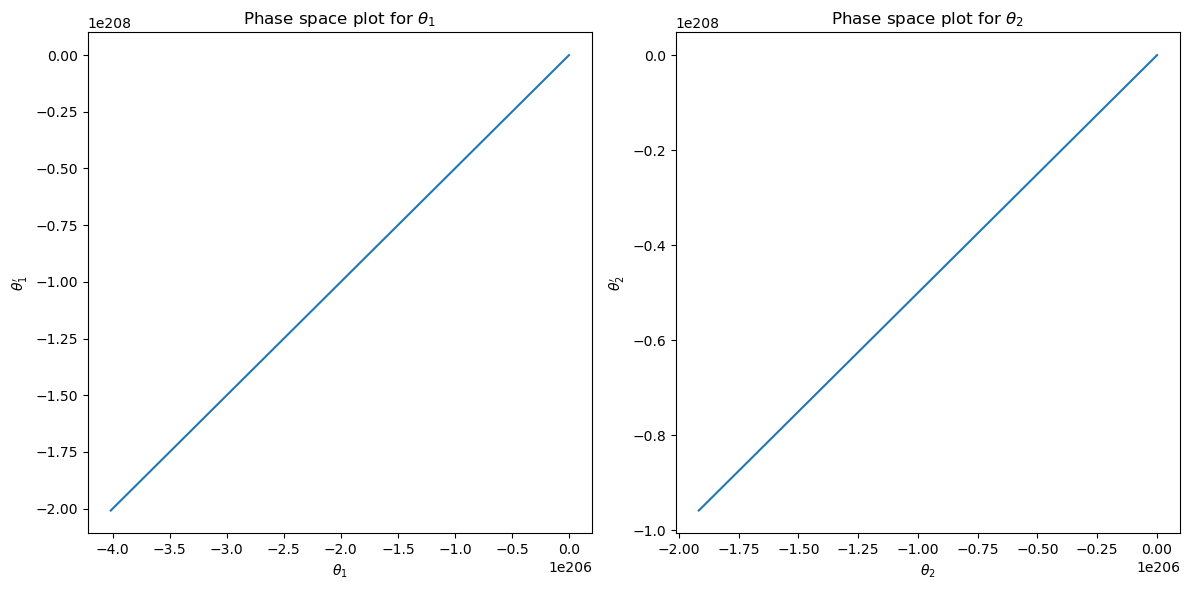

Initial condition:  1e-07


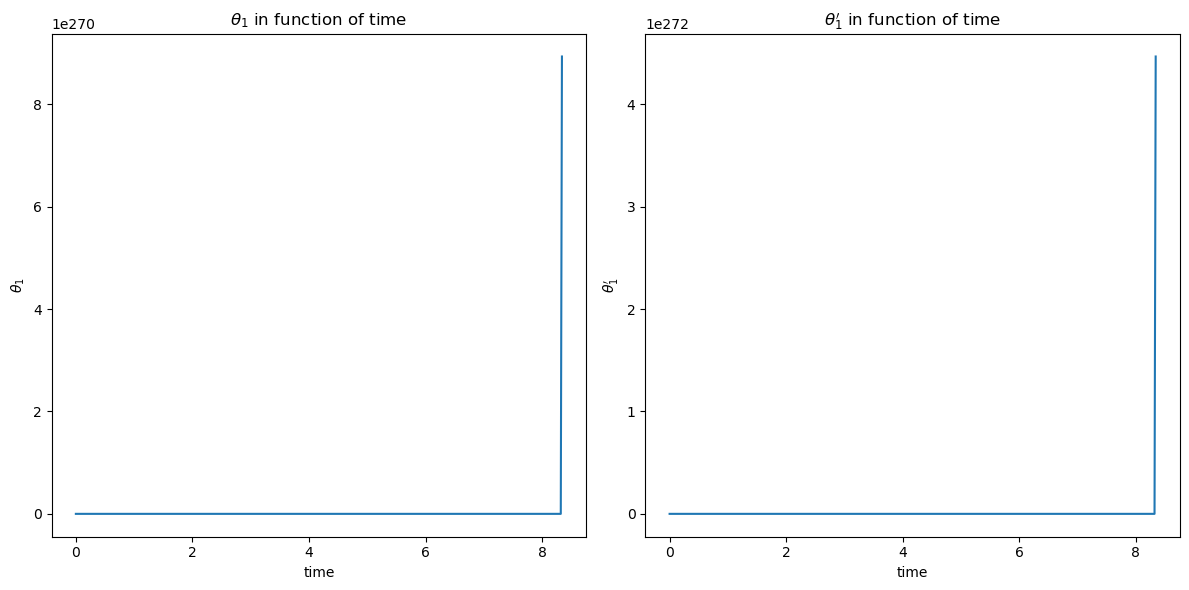

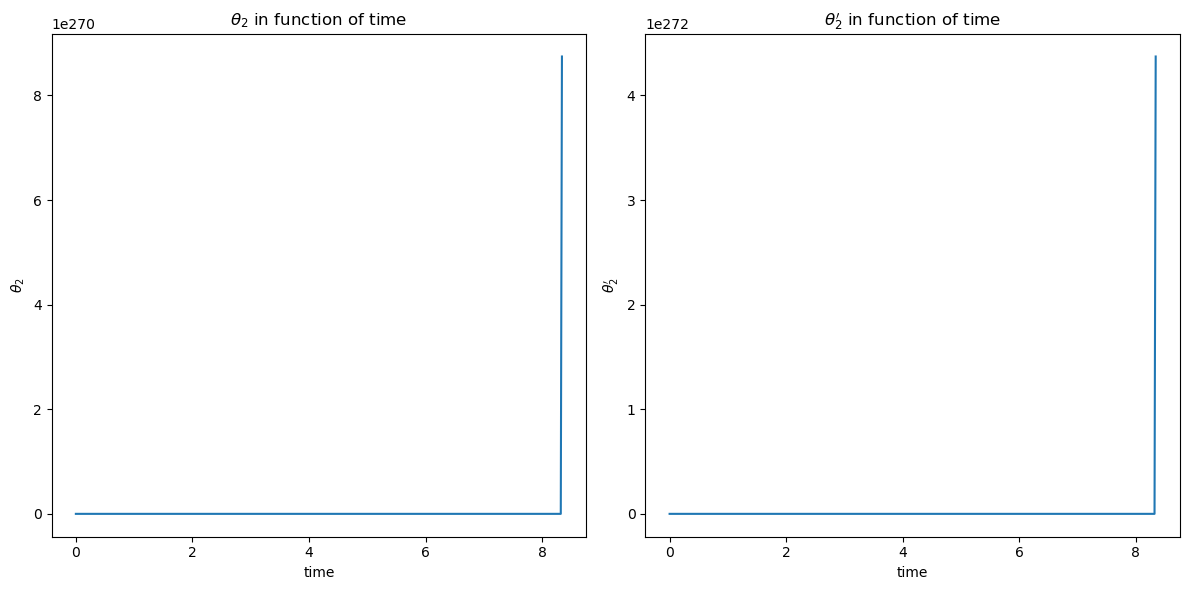

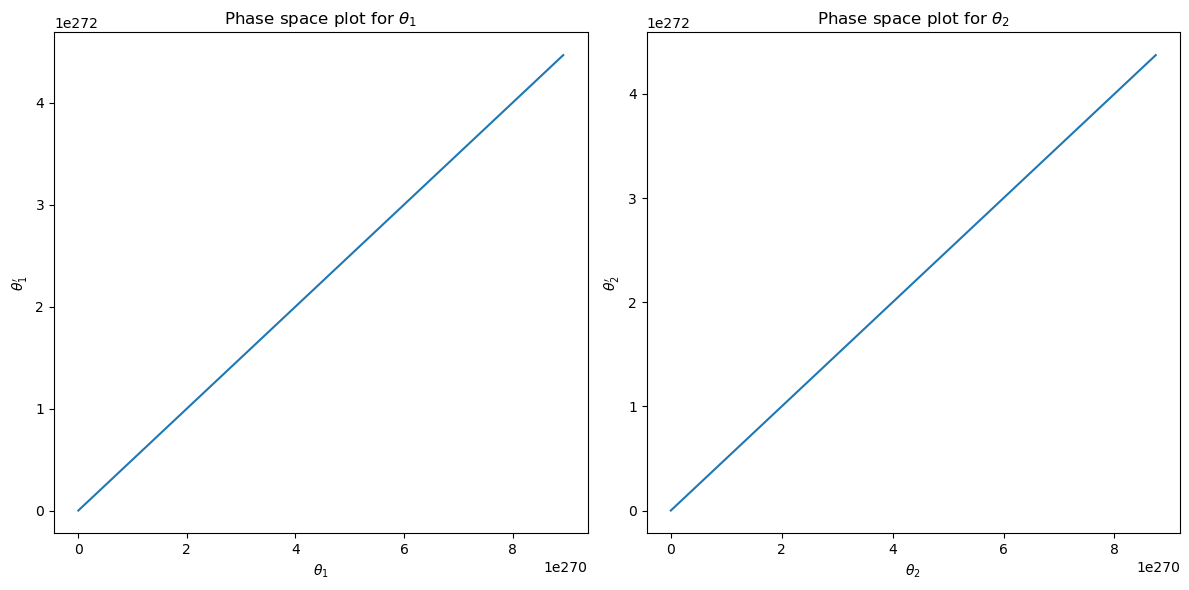

Initial condition:  0.005


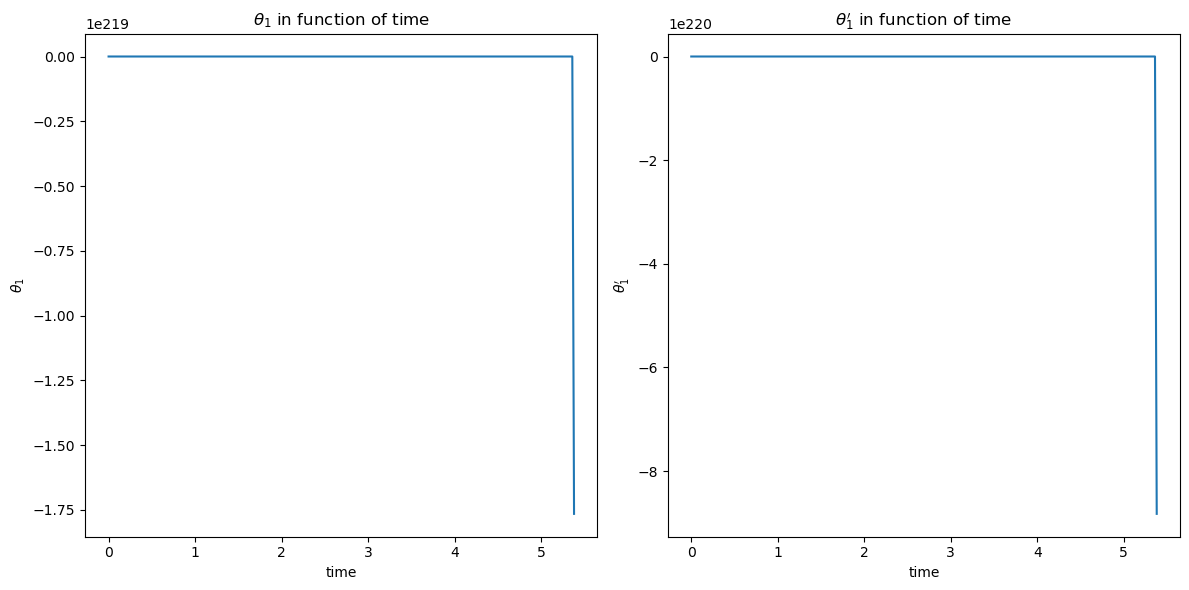

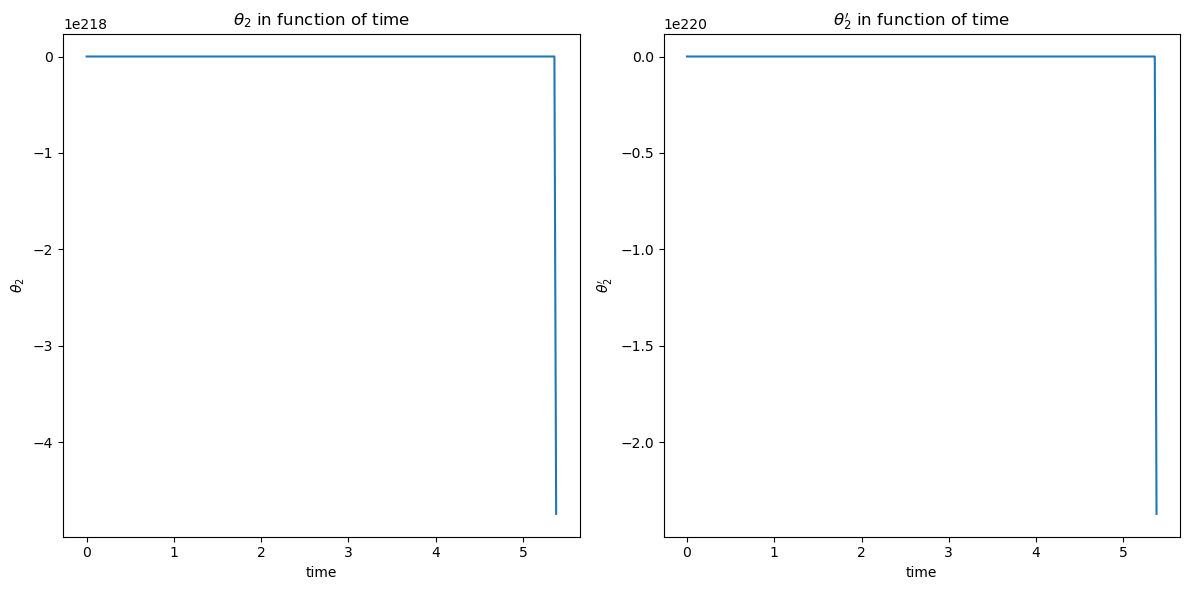

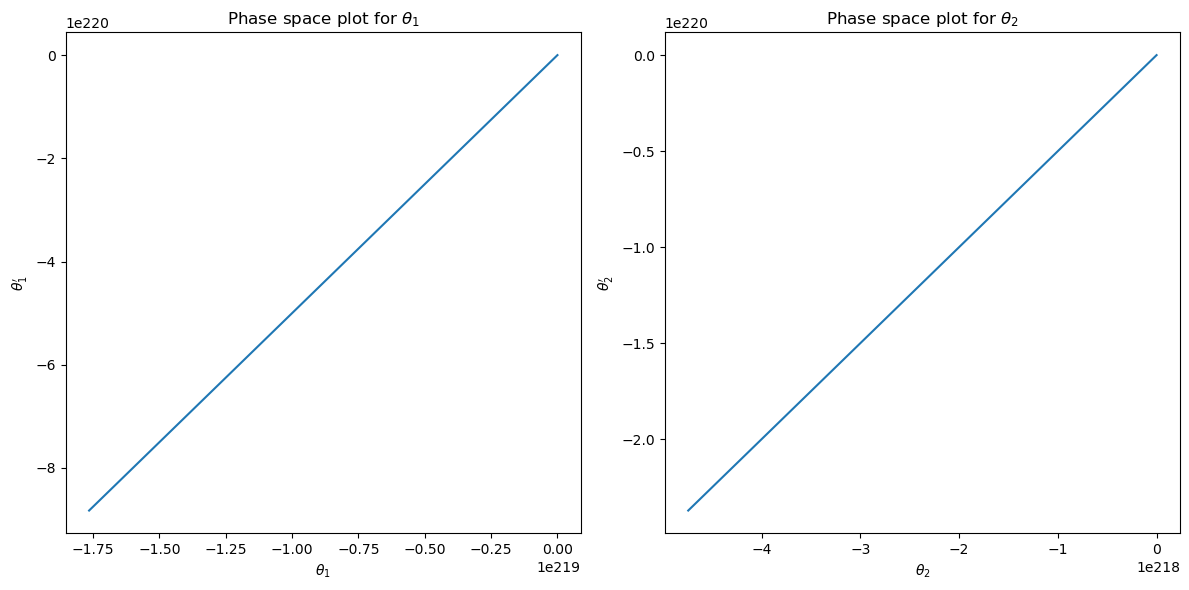

Initial condition:  0.05


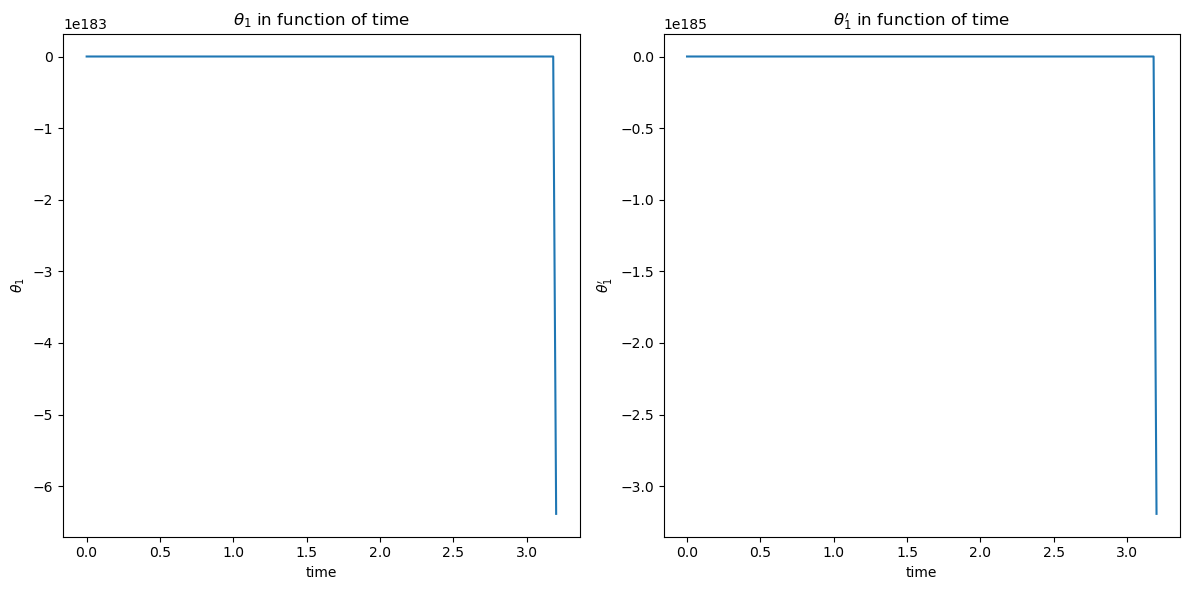

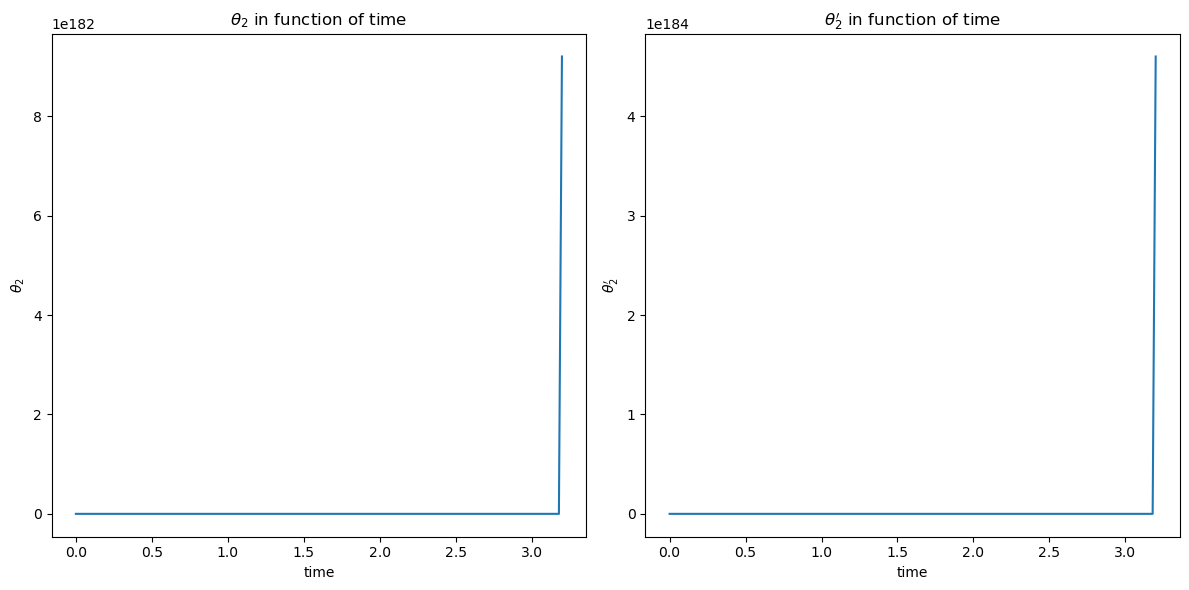

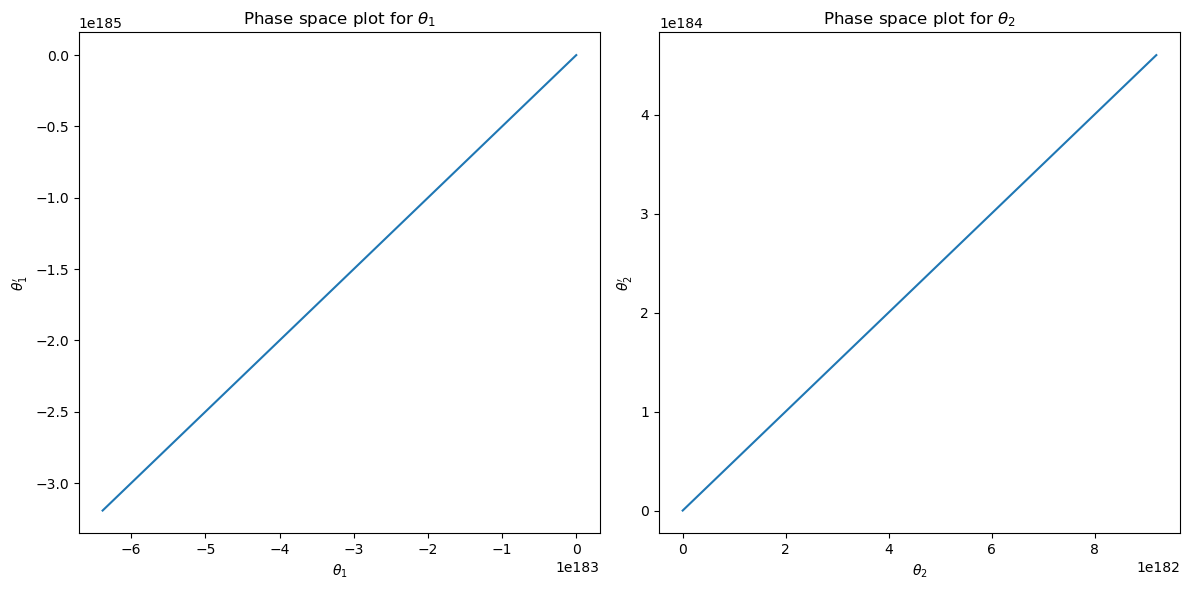

Initial condition:  1


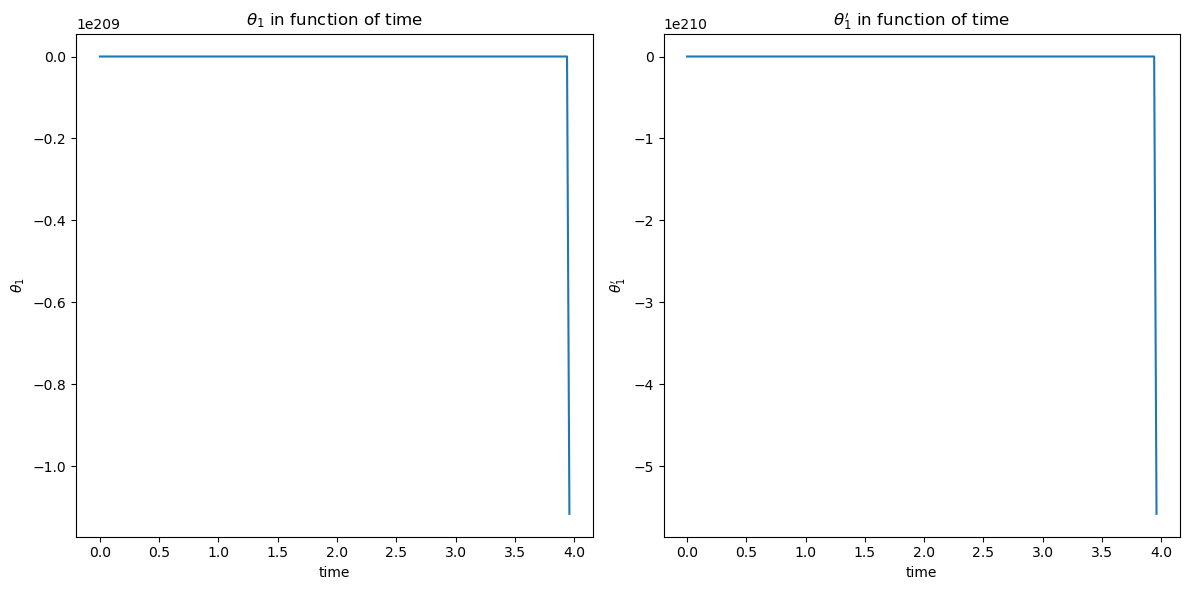

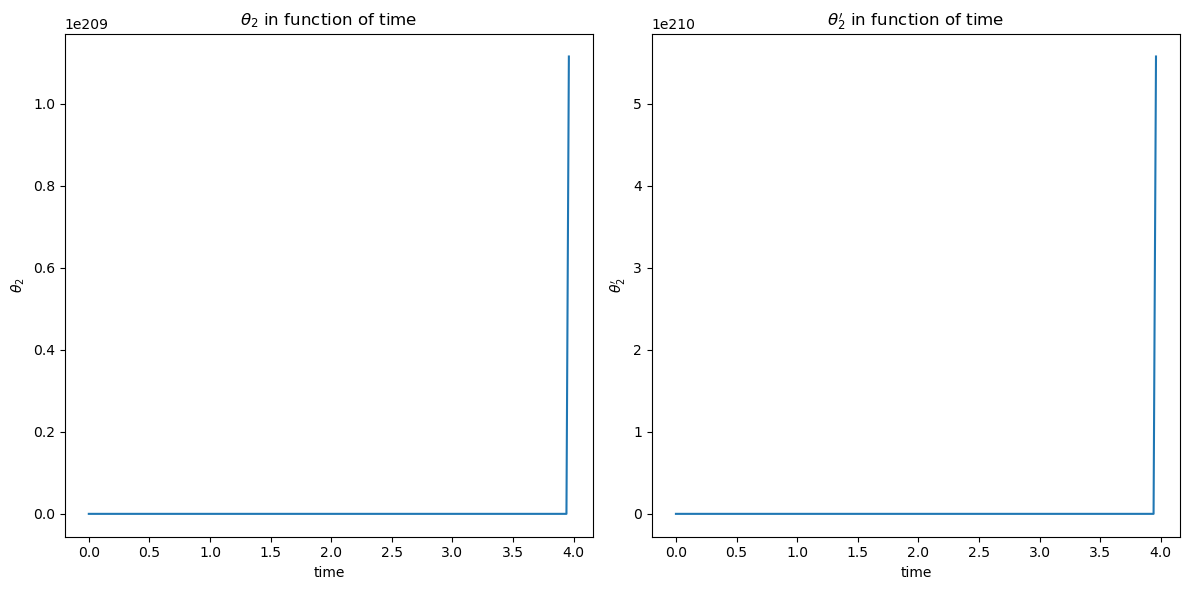

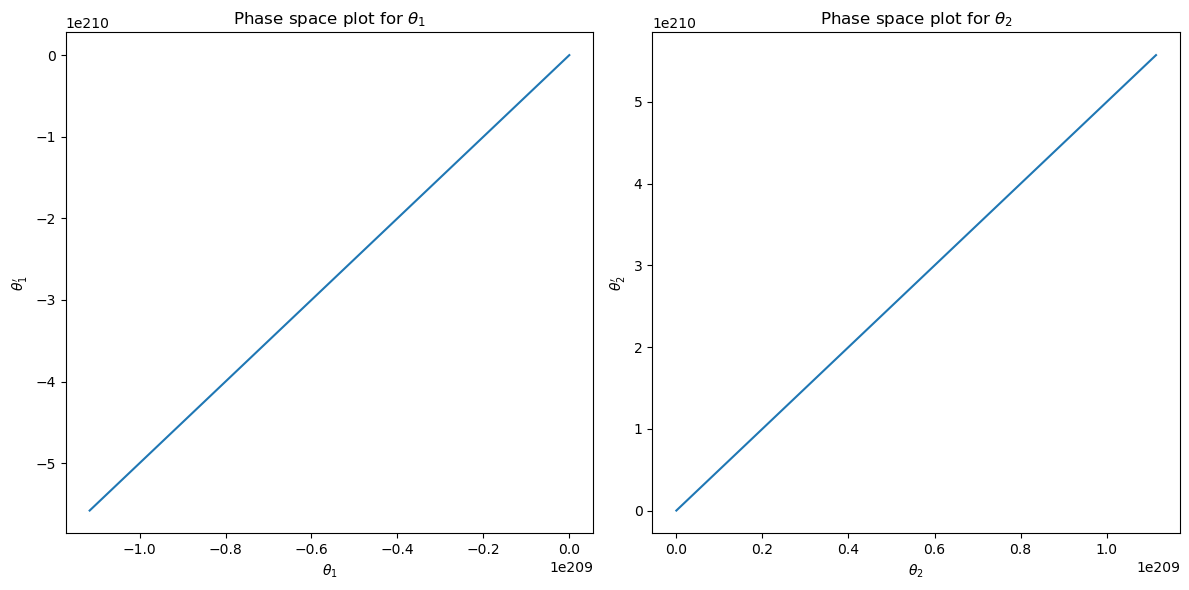

Initial condition:  1.2


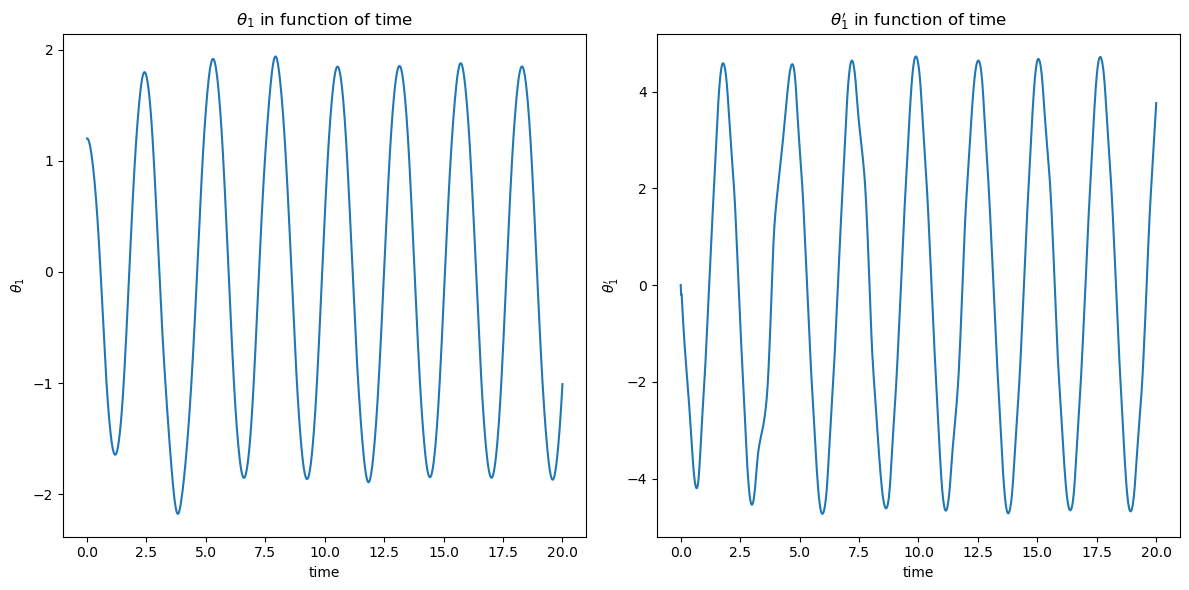

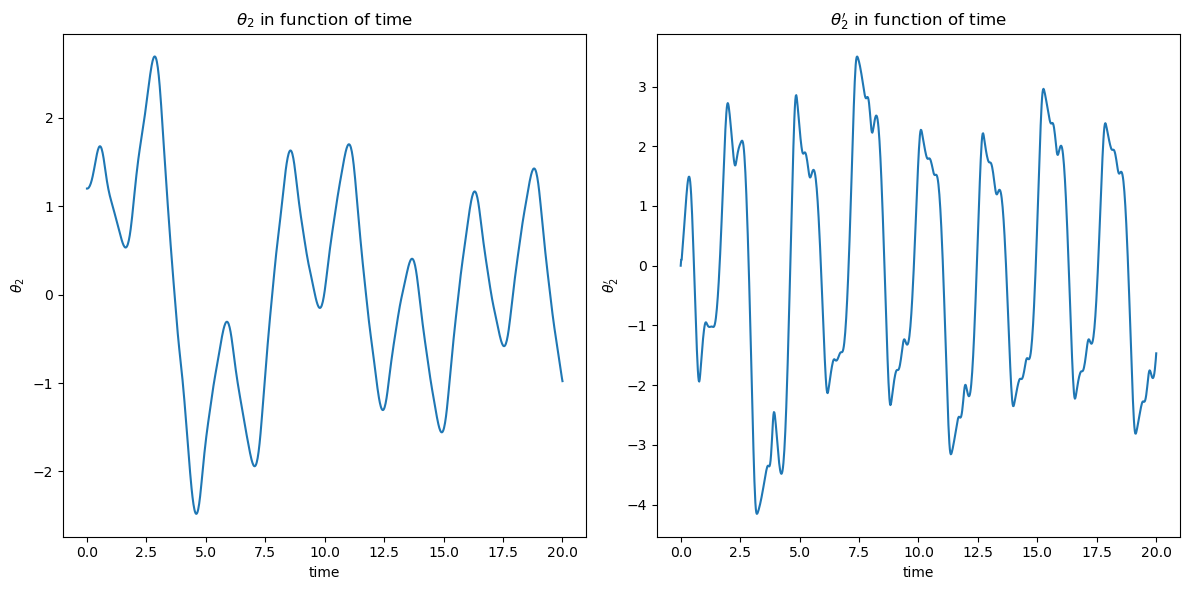

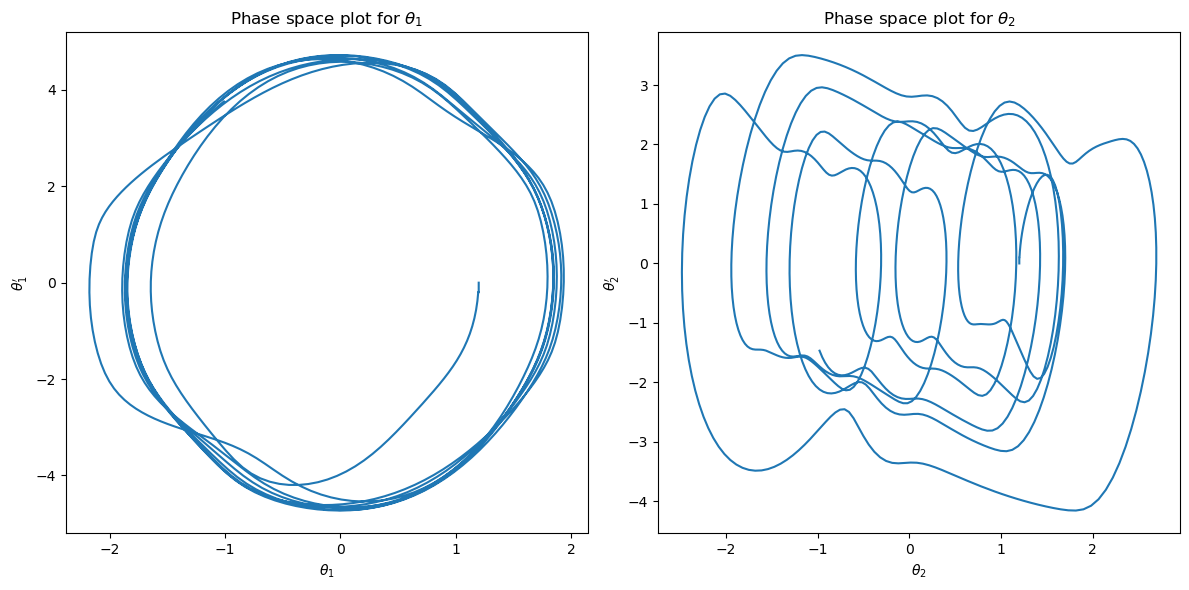

Initial condition:  1.5


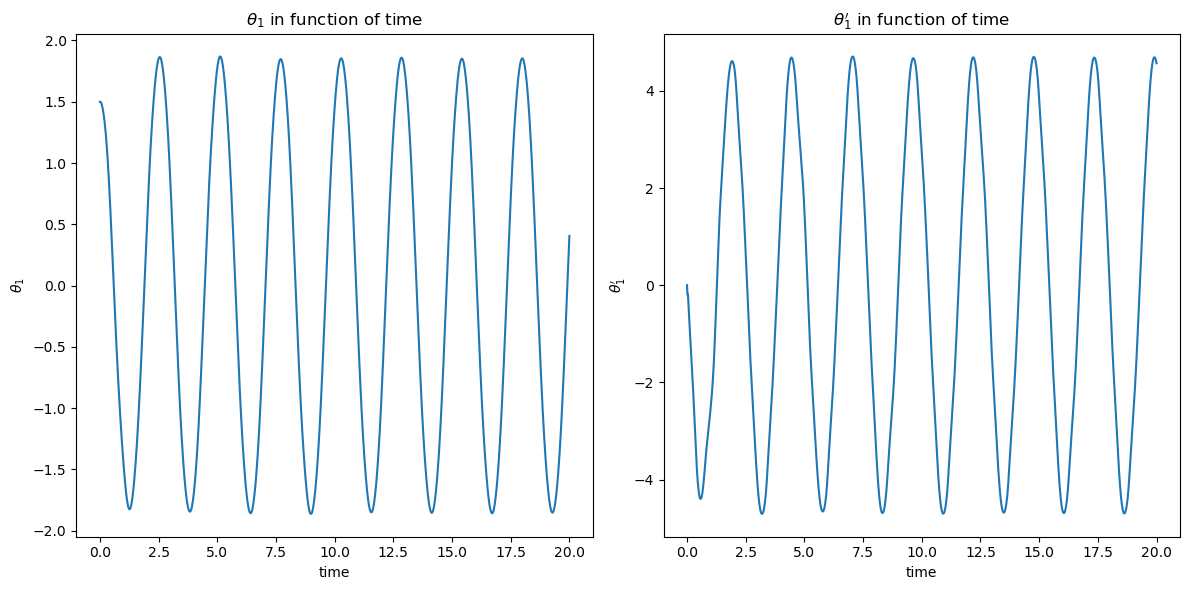

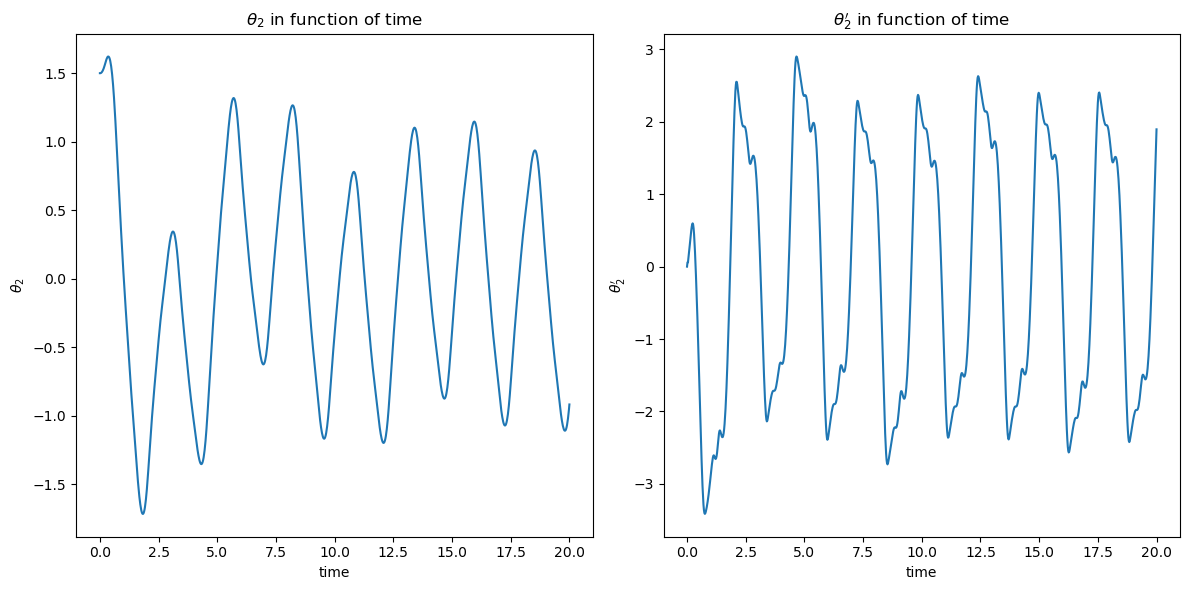

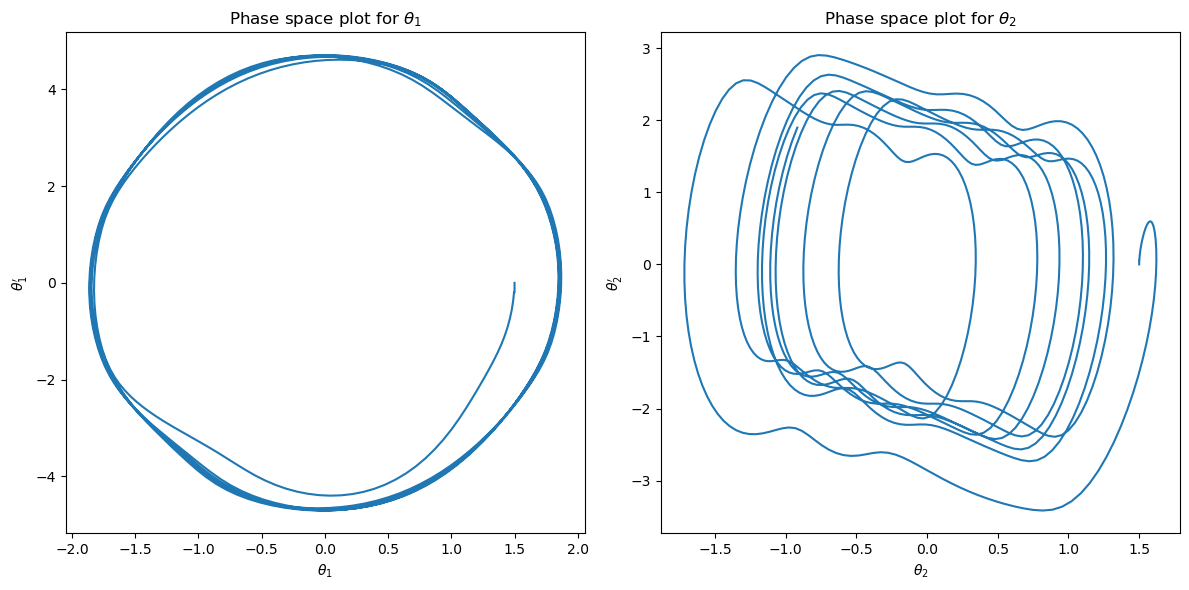

Initial condition:  1.7


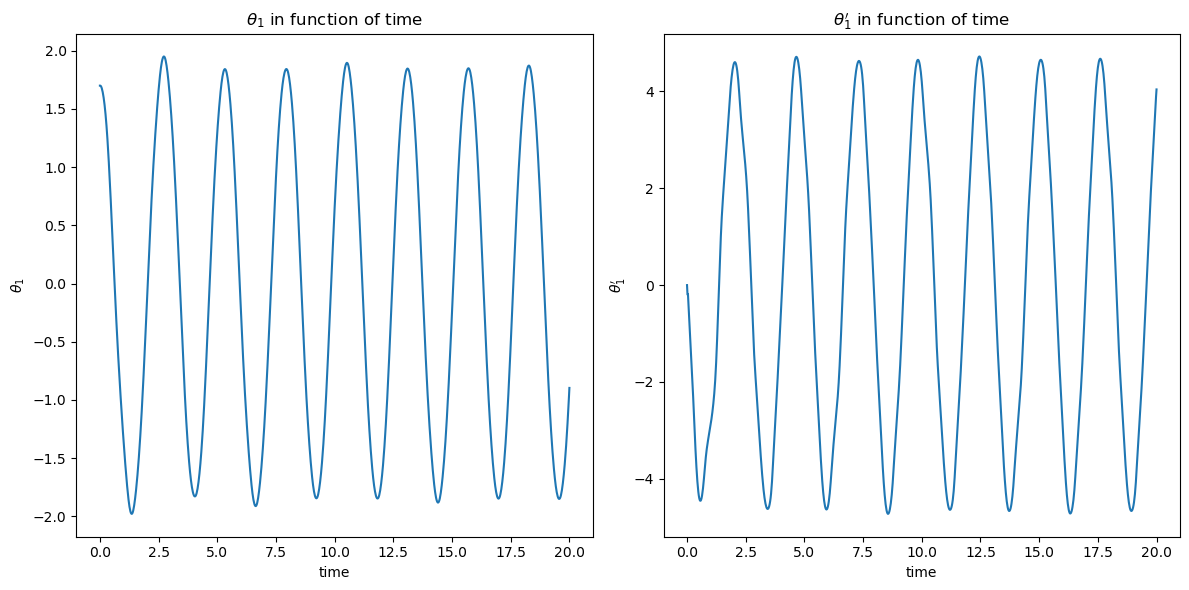

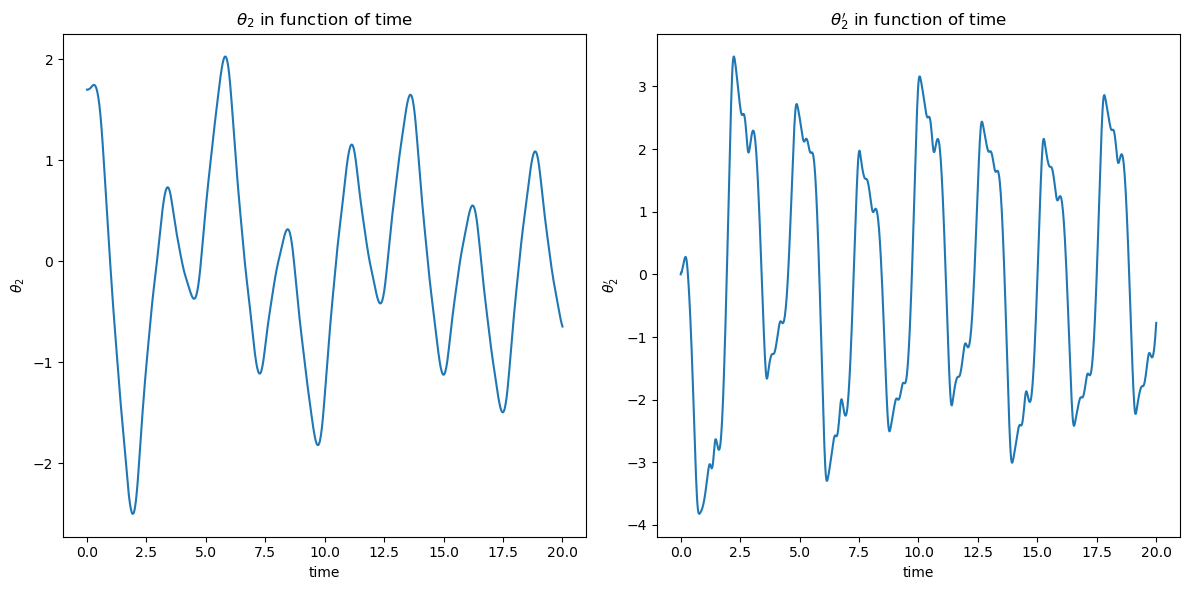

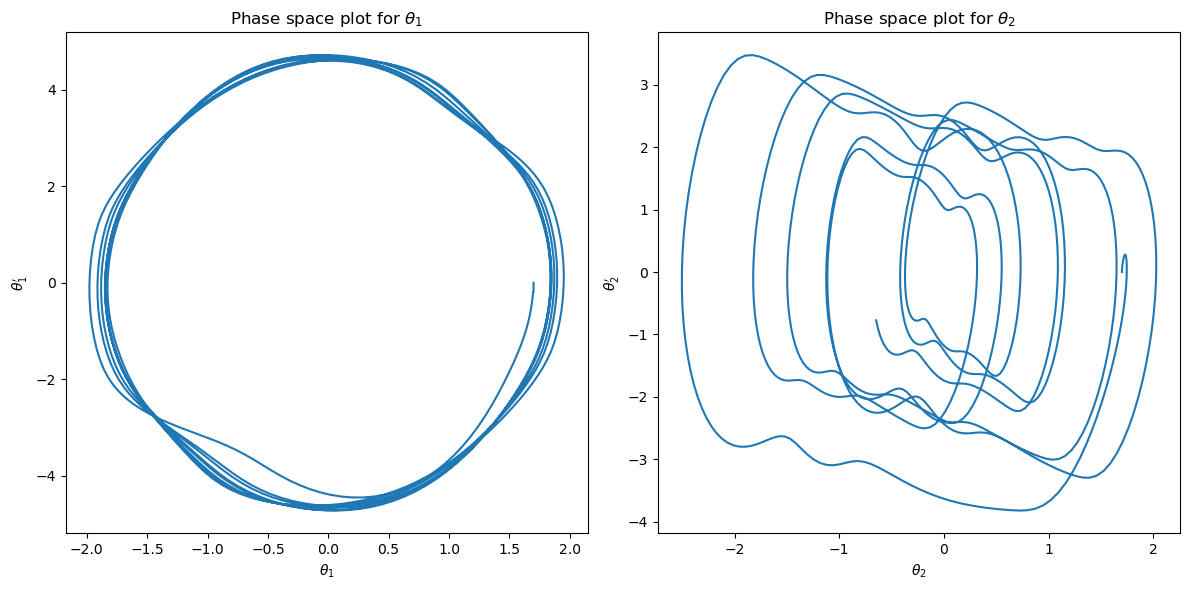

Initial condition:  1.9


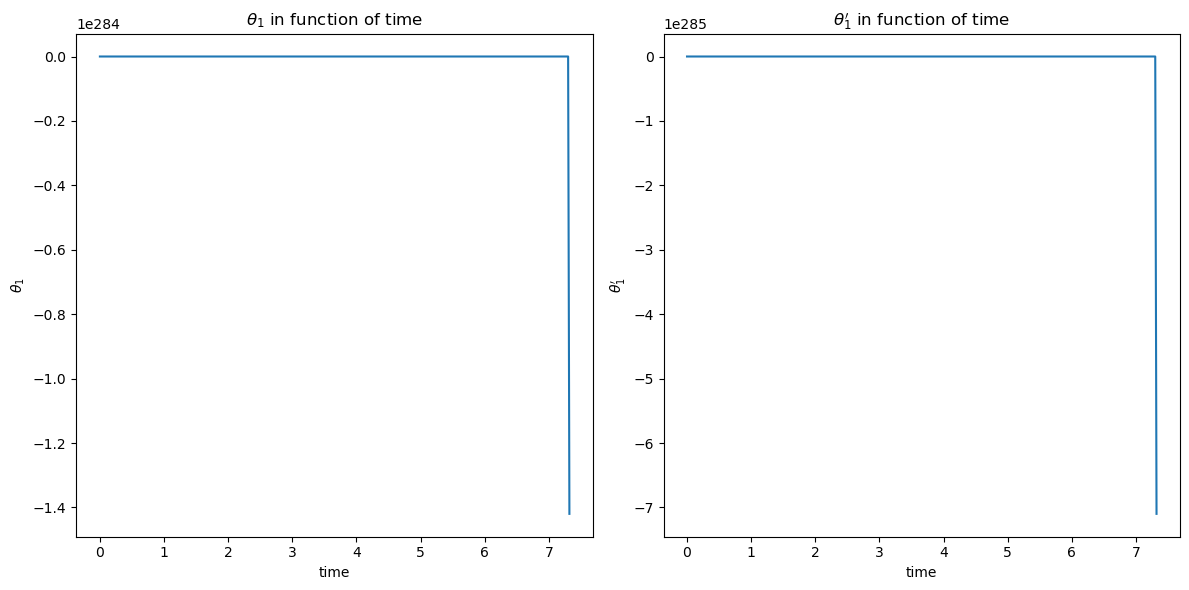

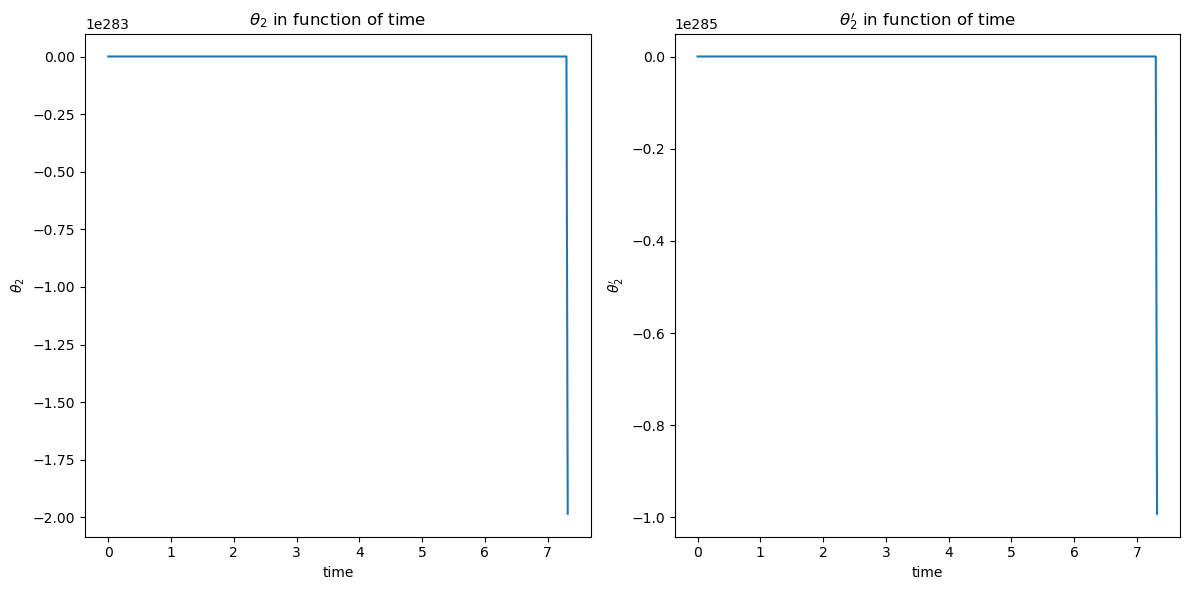

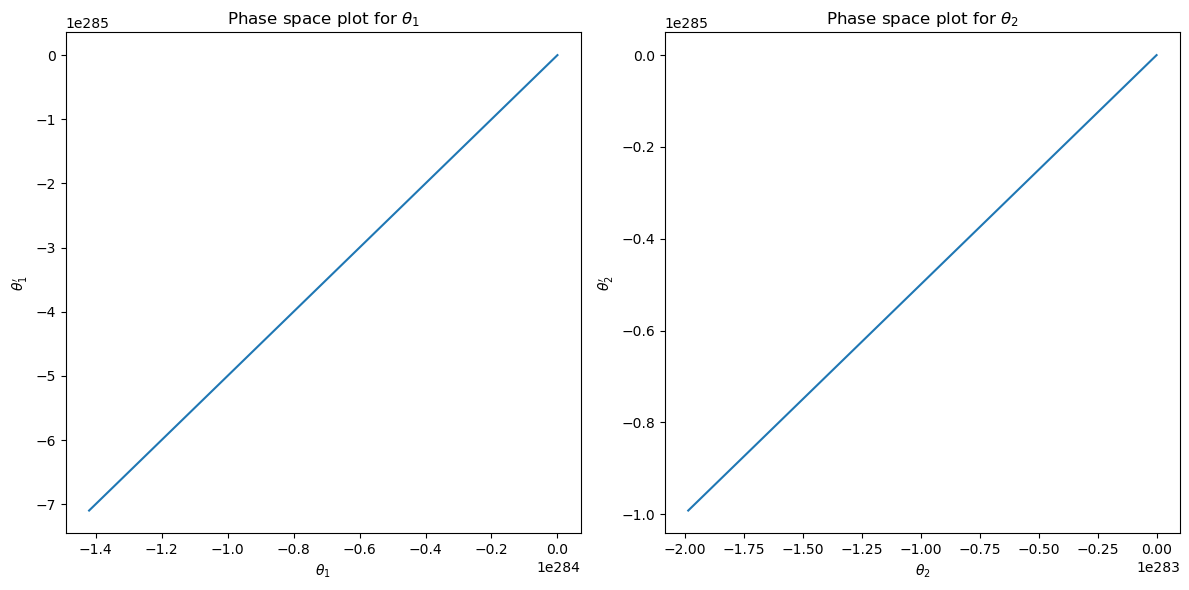

Initial condition:  2


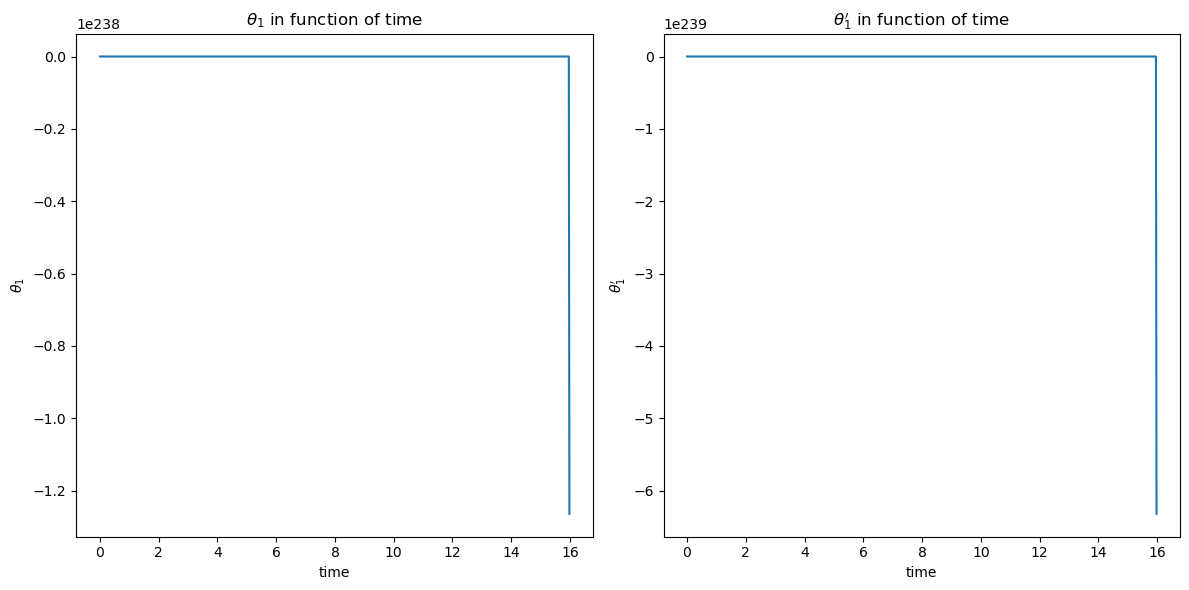

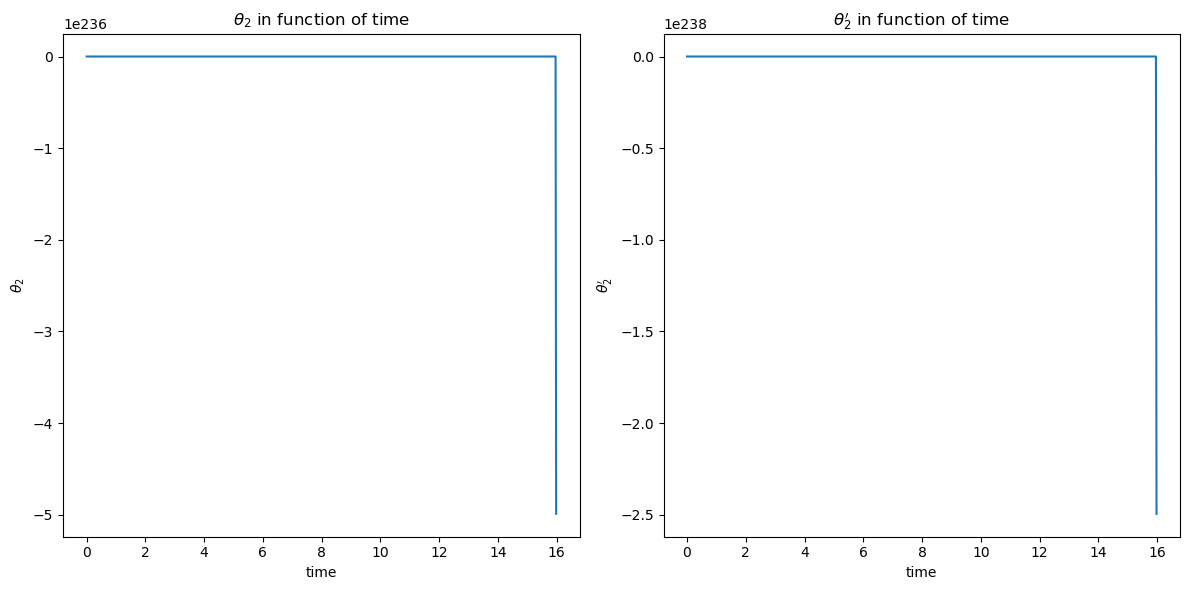

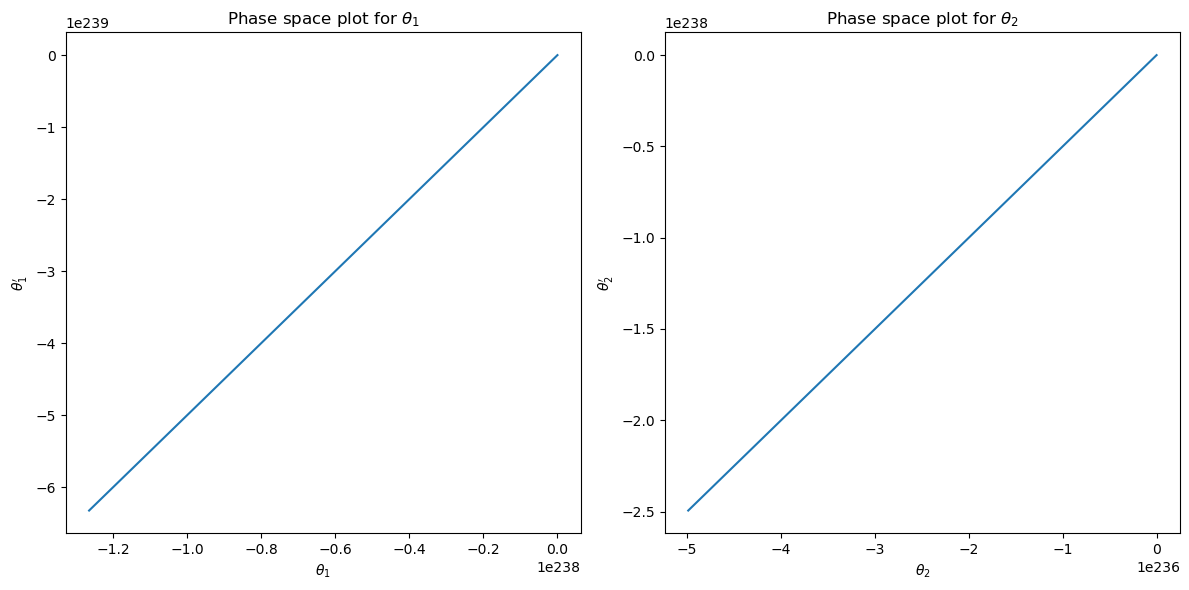

In [54]:
alpha = [1e-9, 1e-7, 0.005, 0.05, 1, 1.2, 1.5, 1.7, 1.9, 2]
for a in alpha:
    print("Initial condition: ", a)
    y0 = np.array([a, a, 0, 0])
    Y = verlet(y0, h, l1, l2, m1, m2, N, g)
    graph_function_time(Y, t)
    PhaseSpacePlot(Y)